В данном ноутбуке проведены исследования по 1-2 шагам из README:

    === ШАГ 1: Исследование данных ===
        ЭТАП 1: Исследование и анализ данных о клиентах
        ЭТАП 2: EDA
        ЭТАП 3: Объеденение данных  
        ЭТАП 4: FEATURE ENGINEERING
        ЭТАП 5: Сохранение данных
       

    === ШАГ 2: Подготовка инфраструктуры ===


=== ШАГ 1: Исследование данных ===  
ЭТАП 1: Исследование и анализ данных о клиентах  

Загружаем библиотеки необходимые для выполнения кода ноутбука.  

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

In [2]:
def load_data_safe(file_name):
    """
    Безопасно загружает CSV файл с обработкой ошибок
    """
    try:
        df = pd.read_csv(file_name)
        print(f"УСПЕХ: {file_name} загружен")
        return df
    except FileNotFoundError:
        print(f"ОШИБКА: Файл {file_name} не найден")
        return None
    except Exception as e:
        print(f"ОШИБКА при загрузке {file_name}: {e}")
        return None

In [3]:
# Загрузка данных с обработкой ошибок
category_tree = load_data_safe('data/category_tree.csv')
events = load_data_safe('data/events.csv')
item_properties_part1 = load_data_safe('data/item_properties_part1.csv')
item_properties_part2 = load_data_safe('data/item_properties_part2.csv')


УСПЕХ: data/category_tree.csv загружен
УСПЕХ: data/events.csv загружен
УСПЕХ: data/item_properties_part1.csv загружен
УСПЕХ: data/item_properties_part2.csv загружен


In [4]:

# Выведем основную информацию о каждом датасете
print("=== category_tree ===")
category_tree.info()
category_tree.head(10)


=== category_tree ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB


,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
5,231,NaN
6,542,378.0
7,1146,542.0
8,1140,542.0
9,1479,1537.0


`category_tree.csv` — таблица из двух столбцов: «родительская категория» и «дочерняя категория». Типичный способ представления таблицы в виде дерева.

In [5]:
print("\n=== events ===")
events.info()
events.head(10)


=== events ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
5,1433224086234,972639,view,22556,NaN
6,1433221923240,810725,view,443030,NaN
7,1433223291897,794181,view,439202,NaN
8,1433220899221,824915,view,428805,NaN
9,1433221204592,339335,view,82389,NaN


`events.csv` — таблица с логом событий:  
- `timestamp` — временная метка события,  
- `visitorid`— идентификатор пользователя,  
- `event` — событие (просмотр, добавление в корзину, покупка),  
- `itemid` — идентификатор товара,  
- `transactionid` — идентификатор транзакции (покупки)  

In [6]:
print("\n=== item_properties_part1 ===")
item_properties_part1.info()
item_properties_part1.head(10)


=== item_properties_part1 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999999 entries, 0 to 10999998
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 335.7+ MB


,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513
5,1436065200000,285026,available,0
6,1434250800000,89534,213,1121373
7,1431831600000,264312,6,319724
8,1433646000000,229370,202,1330310
9,1434250800000,98113,451,1141052 n48.000


`item_properties_part1.csv` — таблица со свойствами товаров:  
- `timestamp` — временная метка добавления свойства,  
- `itemid` — идентификатор товара,  
- `property` — свойство товара,  
- `value` — значение свойства.  

In [7]:
print("\n=== item_properties_part2 ===")
item_properties_part2.info()
item_properties_part2.head(10)


=== item_properties_part2 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9275903 entries, 0 to 9275902
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 283.1+ MB


,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525
3,1431831600000,403324,917,1204143
4,1435460400000,230701,521,769062
5,1433041200000,286407,202,820407
6,1438484400000,256368,888,437265 1296497 n24.000 229949 651738 285933
7,1437879600000,307534,888,150169 212349 1095303 824508 1257235 153900
8,1439089200000,102767,888,5135 790941 1055803 221748 122132 n12.000 1135...
9,1431831600000,215180,71,1096621


`item_properties_part2.csv` — таблица со свойствами товаров:  
- `timestamp` — временная метка добавления свойства,  
- `itemid` — идентификатор товара,  
- `property` — свойство товара,  
- `value` — значение свойства.  

In [8]:
# Объединим item_properties_part1 и item_properties_part2 в один датафрейм
item_properties = pd.concat([item_properties_part1, item_properties_part2], ignore_index=True)
print(f"Объединенная таблица item_properties: {item_properties.shape[0]:,} строк")

Объединенная таблица item_properties: 20,275,902 строк


In [9]:
# Проверка на пропуски
print(" ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:")
print(f"   - category_tree пропуски: {category_tree.isnull().sum().sum()}")
print(f"   - events пропуски: {events.isnull().sum().sum()}")
print(f"   - item_properties пропуски: {item_properties.isnull().sum().sum()}")

 ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:
   - category_tree пропуски: 25
   - events пропуски: 2733644
   - item_properties пропуски: 0


In [10]:
print("\n ПРОВЕРКА ДУБЛИКАТОВ:")

# Полные дубликаты
cat_duplicates = category_tree.duplicated().sum()
events_duplicates = events.duplicated().sum()
item_props_duplicates = item_properties.duplicated().sum()

print(f"   - category_tree: {cat_duplicates:,} полных дубликатов")
print(f"   - events: {events_duplicates:,} полных дубликатов") 
print(f"   - item_properties: {item_props_duplicates:,} полных дубликатов")


 ПРОВЕРКА ДУБЛИКАТОВ:
   - category_tree: 0 полных дубликатов
   - events: 460 полных дубликатов
   - item_properties: 0 полных дубликатов


In [11]:
print("=" * 80)
print("ОЧИСТКА И ПОДГОТОВКА ДАННЫХ")
print("=" * 80)

# 1. Очистка дубликатов в events
print("1. ОЧИСТКА ДУБЛИКАТОВ:")
initial_events_size = len(events)

if events_duplicates > 0:
    events = events.drop_duplicates()
    print(f"    Удалено {events_duplicates} полных дубликатов из events")

# Проверим частичные дубликаты в events (более опасные!)
events_key_duplicates = events.duplicated(subset=['timestamp', 'visitorid', 'itemid', 'event']).sum()
print(f"   - events частичные дубликаты (ключевые поля): {events_key_duplicates:,}")

if events_key_duplicates > 0:
    events = events.drop_duplicates(subset=['timestamp', 'visitorid', 'itemid', 'event'])
    print(f" Удалено {events_key_duplicates} частичных дубликатов из events")

print(f" Размер events: {initial_events_size:,} → {len(events):,} строк")

# 2. Переименование столбцов в PEP8
print("\n2. ПЕРЕИМЕНОВАНИЕ СТОЛБЦОВ (PEP8):")

print("   До переименования:")
print(f"   - category_tree: {list(category_tree.columns)}")
print(f"   - events: {list(events.columns)}")
print(f"   - item_properties: {list(item_properties.columns)}")

# Переименование согласно PEP8 (snake_case)
category_tree = category_tree.rename(columns={
    'categoryid': 'category_id',
    'parentid': 'parent_id'
})

events = events.rename(columns={
    'visitorid': 'visitor_id', 
    'itemid': 'item_id',
    'transactionid': 'transaction_id'
})

item_properties = item_properties.rename(columns={
    'itemid': 'item_id'
})

print("   После переименования:")
print(f"   - category_tree: {list(category_tree.columns)}")
print(f"   - events: {list(events.columns)}")
print(f"   - item_properties: {list(item_properties.columns)}")

# 3. Детальный анализ пропусков
print("\n3. ДЕТАЛЬНЫЙ АНАЛИЗ ПРОПУСКОВ:")

# В events
events_nulls = events.isnull().sum()
print(f"   - events:")
print(f"     transaction_id: {events_nulls['transaction_id']:,} пропусков")
print(f"     (это ожидаемо - пропуски для событий 'view' и 'addtocart')")

# В category_tree
category_nulls = category_tree.isnull().sum()
print(f"   - category_tree:")
print(f"     parent_id: {category_nulls['parent_id']:,} пропусков")
print(f"     (это корневые категории - ожидаемо)")

# В item_properties
item_props_nulls = item_properties.isnull().sum()
print(f"   - item_properties: {item_props_nulls.sum():,} пропусков")

# 4. Проверка целостности данных
print("\n4. ПРОВЕРКА ЦЕЛОСТНОСТИ ДАННЫХ:")

# В category_tree - проверка "сиротских" parent_id
orphan_parents = set(category_tree['parent_id'].dropna()) - set(category_tree['category_id'])
print(f"   - category_tree 'сиротских' parent_id: {len(orphan_parents)}")

# Проверка уникальности category_id
cat_id_duplicates = category_tree.duplicated(subset=['category_id']).sum()
print(f"   - category_tree дубликаты category_id: {cat_id_duplicates}")


ОЧИСТКА И ПОДГОТОВКА ДАННЫХ
1. ОЧИСТКА ДУБЛИКАТОВ:
    Удалено 460 полных дубликатов из events
   - events частичные дубликаты (ключевые поля): 0
 Размер events: 2,756,101 → 2,755,641 строк

2. ПЕРЕИМЕНОВАНИЕ СТОЛБЦОВ (PEP8):
   До переименования:
   - category_tree: ['categoryid', 'parentid']
   - events: ['timestamp', 'visitorid', 'event', 'itemid', 'transactionid']
   - item_properties: ['timestamp', 'itemid', 'property', 'value']
   После переименования:
   - category_tree: ['category_id', 'parent_id']
   - events: ['timestamp', 'visitor_id', 'event', 'item_id', 'transaction_id']
   - item_properties: ['timestamp', 'item_id', 'property', 'value']

3. ДЕТАЛЬНЫЙ АНАЛИЗ ПРОПУСКОВ:
   - events:
     transaction_id: 2,733,184 пропусков
     (это ожидаемо - пропуски для событий 'view' и 'addtocart')
   - category_tree:
     parent_id: 25 пропусков
     (это корневые категории - ожидаемо)
   - item_properties: 0 пропусков

4. ПРОВЕРКА ЦЕЛОСТНОСТИ ДАННЫХ:
   - category_tree 'сиротских' par

In [12]:
print("\n" + "=" * 80)
print("ДАННЫЕ ПОДГОТОВЛЕНЫ ДАЛЬНЕЙШЕМУ АНАЛИЗУ")
print("=" * 80)
print(f"events: {len(events):,} строк (удалено {initial_events_size - len(events):,} дубликатов)")
print(f"category_tree: {len(category_tree):,} строк")
print(f"item_properties: {len(item_properties):,} строк")
print(f"Столбцы переименованы в PEP8")


ДАННЫЕ ПОДГОТОВЛЕНЫ ДАЛЬНЕЙШЕМУ АНАЛИЗУ
events: 2,755,641 строк (удалено 460 дубликатов)
category_tree: 1,669 строк
item_properties: 20,275,902 строк
Столбцы переименованы в PEP8


ЭТАП 2: EDA  

`category_tree.csv`

АНАЛИЗ category_tree
1. БАЗОВАЯ ИНФОРМАЦИЯ:
   - Всего записей: 1,669
   - Уникальных категорий: 1,669
   - Пропуски в parent_id: 25

2. СТРУКТУРА ДЕРЕВА КАТЕГОРИЙ:
   - Корневых категорий (без родителя): 25
   - Категорий, имеющих дочерние: 362
   - Конечных категорий (без дочерних): 1,307

3. РАСПРЕДЕЛЕНИЕ ДОЧЕРНИХ КАТЕГОРИЙ:
   - Максимум дочерних категорий у одного родителя: 31
   - Среднее количество дочерних категорий: 4.5
   - Медиана количества дочерних категорий: 4.0


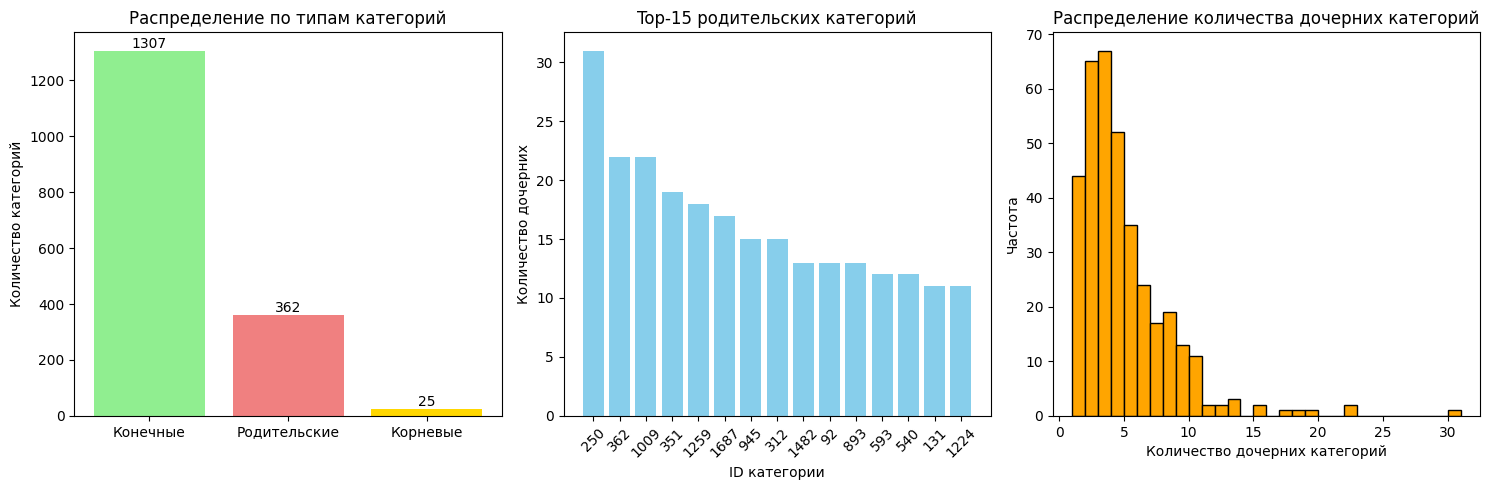

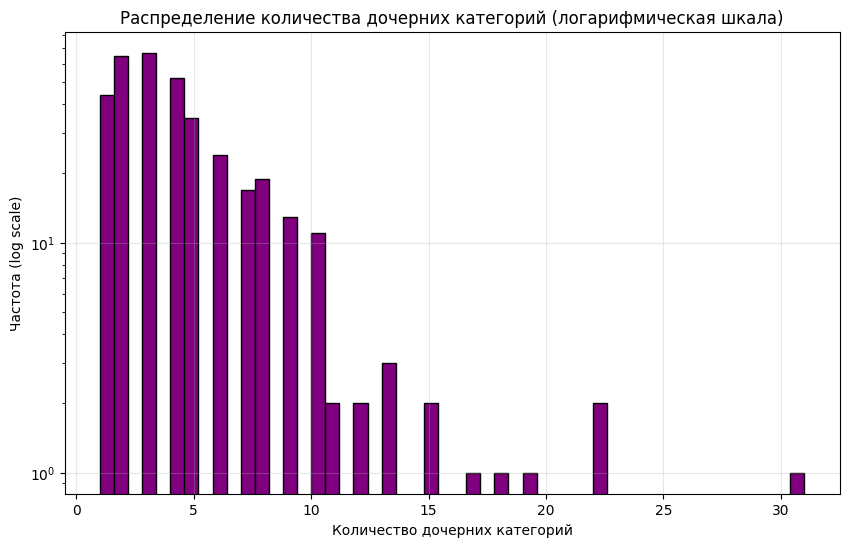


4. ДЕТАЛЬНЫЙ АНАЛИЗ TOP-5 РОДИТЕЛЬСКИХ КАТЕГОРИЙ:
   - Категория 250: 31 дочерних категорий
   - Категория 362: 22 дочерних категорий
   - Категория 1009: 22 дочерних категорий
   - Категория 351: 19 дочерних категорий
   - Категория 1259: 18 дочерних категорий

5. ПРОВЕРКА ЦЕЛОСТНОСТИ ДАННЫХ:
   - 'Сиротских' parent_id (нет в category_id): 0

6. СТАТИСТИКА:
       category_id    parent_id
count  1669.000000  1644.000000
mean    849.285201   847.571168
std     490.195116   505.058485
min       0.000000     8.000000
25%     427.000000   381.000000
50%     848.000000   866.000000
75%    1273.000000  1291.000000
max    1698.000000  1698.000000


In [13]:
# Создаем папку для графиков
os.makedirs('eda_plots', exist_ok=True)

print("=" * 80)
print("АНАЛИЗ category_tree")
print("=" * 80)

# 1. Базовая информация
print("1. БАЗОВАЯ ИНФОРМАЦИЯ:")
print(f"   - Всего записей: {len(category_tree):,}")
print(f"   - Уникальных категорий: {category_tree['category_id'].nunique():,}")
print(f"   - Пропуски в parent_id: {category_tree['parent_id'].isna().sum():,}")

# 2. Анализ структуры дерева
print("\n2. СТРУКТУРА ДЕРЕВА КАТЕГОРИЙ:")

# Корневые категории (без родителя)
root_categories = category_tree[category_tree['parent_id'].isna()]
print(f"   - Корневых категорий (без родителя): {len(root_categories):,}")

# Категории, которые являются родителями (имеют дочерние)
parent_categories = category_tree[category_tree['category_id'].isin(category_tree['parent_id'])]
print(f"   - Категорий, имеющих дочерние: {parent_categories['category_id'].nunique():,}")

# Конечные категории (не являются родителями)
leaf_categories = category_tree[~category_tree['category_id'].isin(category_tree['parent_id'])]
print(f"   - Конечных категорий (без дочерних): {leaf_categories['category_id'].nunique():,}")

# 3. Анализ распределения количества дочерних категорий
print("\n3. РАСПРЕДЕЛЕНИЕ ДОЧЕРНИХ КАТЕГОРИЙ:")
child_counts = category_tree['parent_id'].value_counts()
print(f"   - Максимум дочерних категорий у одного родителя: {child_counts.max()}")
print(f"   - Среднее количество дочерних категорий: {child_counts.mean():.1f}")
print(f"   - Медиана количества дочерних категорий: {child_counts.median():.1f}")

# 4. Визуализация с сохранением графиков
plt.figure(figsize=(15, 5))

# График 1: Типы категорий
plt.subplot(1, 3, 1)
category_types = [len(leaf_categories), len(parent_categories), len(root_categories)]
labels = ['Конечные', 'Родительские', 'Корневые']
plt.bar(labels, category_types, color=['lightgreen', 'lightcoral', 'gold'])
plt.title('Распределение по типам категорий')
plt.ylabel('Количество категорий')
for i, v in enumerate(category_types):
    plt.text(i, v, str(v), ha='center', va='bottom')

# График 2: Top-15 родительских категорий по количеству дочерних
plt.subplot(1, 3, 2)
top_parents = child_counts.head(15)
plt.bar([str(int(x)) for x in top_parents.index], top_parents.values, color='skyblue')
plt.title('Top-15 родительских категорий')
plt.xlabel('ID категории')
plt.ylabel('Количество дочерних')
plt.xticks(rotation=45)

# График 3: Распределение количества дочерних категорий
plt.subplot(1, 3, 3)
plt.hist(child_counts.values, bins=30, color='orange', edgecolor='black')
plt.title('Распределение количества дочерних категорий')
plt.xlabel('Количество дочерних категорий')
plt.ylabel('Частота')

plt.tight_layout()
plt.savefig('eda_plots/category_tree_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Дополнительные графики
# График 4: Распределение категорий (логарифмическая шкала)
plt.figure(figsize=(10, 6))
plt.hist(child_counts.values, bins=50, color='purple', edgecolor='black', log=True)
plt.title('Распределение количества дочерних категорий (логарифмическая шкала)')
plt.xlabel('Количество дочерних категорий')
plt.ylabel('Частота (log scale)')
plt.grid(True, alpha=0.3)
plt.savefig('eda_plots/category_tree_distribution_log.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. Детальный анализ топ-5 родительских категорий
print("\n4. ДЕТАЛЬНЫЙ АНАЛИЗ TOP-5 РОДИТЕЛЬСКИХ КАТЕГОРИЙ:")
top_5_parents = child_counts.head(5)
for parent_id, child_count in top_5_parents.items():
    if pd.isna(parent_id):
        continue
    print(f"   - Категория {int(parent_id)}: {child_count} дочерних категорий")

# 7. Проверка целостности данных
print("\n5. ПРОВЕРКА ЦЕЛОСТНОСТИ ДАННЫХ:")
# Категории, которые есть в parent_id, но нет в category_id
orphan_parents = set(category_tree['parent_id'].dropna()) - set(category_tree['category_id'])
print(f"   - 'Сиротских' parent_id (нет в category_id): {len(orphan_parents)}")

# 8. Статистика
print("\n6. СТАТИСТИКА:")
print(category_tree.describe())

In [14]:
print("\n" + "=" * 80)
print("ВЫВОДЫ ПО CATEGORY_TREE:")
print("=" * 80)

print("\n СТРУКТУРА ДАННЫХ:")
print(f"- Всего {len(category_tree):,} категорий в иерархии")
print(f"- {len(root_categories):,} корневых категорий (основные разделы магазина)")
print(f"- {len(parent_categories):,} родительских категорий (средний уровень вложенности)") 
print(f"- {len(leaf_categories):,} конечных категорий (конкретные товарные группы)")

print("\n СТАТИСТИКА РАСПРЕДЕЛЕНИЯ:")
print(f"- Максимальная ширина дерева: {child_counts.max()} дочерних у одного родителя")
print(f"- Среднее количество дочерних: {child_counts.mean():.1f} на родителя")
print(f"- Медианное количество: {child_counts.median():.1f} дочерних на родителя")
print(f"- Распределение имеет 'длинный хвост' - большинство категорий имеют мало дочерних")

print("\n КАЧЕСТВО ДАННЫХ:")
print(f"- Нет дубликатов - данные чистые")
print(f"- Нет сиротских категорий - все ссылки целостные")
print(f"- {category_tree['parent_id'].isna().sum()} пропусков (корневые категории - ожидаемо)")


ВЫВОДЫ ПО CATEGORY_TREE:

 СТРУКТУРА ДАННЫХ:
- Всего 1,669 категорий в иерархии
- 25 корневых категорий (основные разделы магазина)
- 362 родительских категорий (средний уровень вложенности)
- 1,307 конечных категорий (конкретные товарные группы)

 СТАТИСТИКА РАСПРЕДЕЛЕНИЯ:
- Максимальная ширина дерева: 31 дочерних у одного родителя
- Среднее количество дочерних: 4.5 на родителя
- Медианное количество: 4.0 дочерних на родителя
- Распределение имеет 'длинный хвост' - большинство категорий имеют мало дочерних

 КАЧЕСТВО ДАННЫХ:
- Нет дубликатов - данные чистые
- Нет сиротских категорий - все ссылки целостные
- 25 пропусков (корневые категории - ожидаемо)


`events.csv`

In [15]:
# Создаем папку для графиков (если еще не создана)
os.makedirs('eda_plots', exist_ok=True)

print("=" * 80)
print("ГЛУБОКИЙ АНАЛИЗ EVENTS")
print("=" * 80)

# 1. Базовая информация
print("1. БАЗОВАЯ ИНФОРМАЦИЯ:")
print(f"   - Всего событий: {len(events):,}")
print(f"   - Уникальных пользователей: {events['visitor_id'].nunique():,}")
print(f"   - Уникальных товаров: {events['item_id'].nunique():,}")
print(f"   - Период данных: от {pd.to_datetime(events['timestamp'].min(), unit='ms')} до {pd.to_datetime(events['timestamp'].max(), unit='ms')}")

# 2. Анализ типов событий
print("\n2. РАСПРЕДЕЛЕНИЕ ТИПОВ СОБЫТИЙ:")
event_counts = events['event'].value_counts()
event_percentages = (event_counts / len(events)) * 100

for event, count in event_counts.items():
    percentage = event_percentages[event]
    print(f"   - {event}: {count:,} ({percentage:.1f}%)")

# 3. Анализ транзакций
print("\n3. АНАЛИЗ ТРАНЗАКЦИЙ:")
transactions = events[events['transaction_id'].notna()]
print(f"   - Всего транзакций (покупок): {transactions['transaction_id'].nunique():,}")
print(f"   - Уникальных товаров в покупках: {transactions['item_id'].nunique():,}")
print(f"   - Уникальных пользователей, совершивших покупки: {transactions['visitor_id'].nunique():,}")

# 4. НОВЫЕ МЕТРИКИ
print("\n4. КЛЮЧЕВЫЕ БИЗНЕС-МЕТРИКИ:")

# Уникальные пользователи
print(f"   - Уникальных пользователей: {events['visitor_id'].nunique():,}")

# Расчет пользователей, добавивших в корзину
addtocart_events = events[events['event'] == 'addtocart']
addtocart_users = addtocart_events['visitor_id'].nunique()

# Конверсия пользователей в покупки
conversion_rate = (transactions['visitor_id'].nunique() / events['visitor_id'].nunique()) * 100
print(f"   - Конверсия пользователей в покупки: {conversion_rate:.2f}%")

# Конверсия пользователей в корзину
addtocart_conversion = (addtocart_users / events['visitor_id'].nunique()) * 100
print(f"   - Конверсия пользователей в корзину: {addtocart_conversion:.2f}%")

# Конверсия из корзины в покупку
cart_to_purchase_rate = (transactions['visitor_id'].nunique() / addtocart_users) * 100
print(f"   - Конверсия из корзины в покупку: {cart_to_purchase_rate:.2f}%")

# Расчет статистики по пользователям
user_stats = events.groupby('visitor_id').agg({
    'event': 'count',
    'item_id': 'nunique'
}).round(2)
user_stats.columns = ['total_events', 'unique_items']

# Средние события на пользователя
avg_events_per_user = user_stats['total_events'].mean()
print(f"   - Среднее событий на пользователя: {avg_events_per_user:.1f}")

# Среднее уникальных товаров на пользователя  
avg_items_per_user = user_stats['unique_items'].mean()
print(f"   - Среднее уникальных товаров на пользователя: {avg_items_per_user:.1f}")

# 5. Преобразование временных меток для анализа
events['datetime'] = pd.to_datetime(events['timestamp'], unit='ms')
events['date'] = events['datetime'].dt.date
events['hour'] = events['datetime'].dt.hour
events['day_of_week'] = events['datetime'].dt.day_name()
events['month'] = events['datetime'].dt.month
events['year_month'] = events['datetime'].dt.to_period('M')


ГЛУБОКИЙ АНАЛИЗ EVENTS
1. БАЗОВАЯ ИНФОРМАЦИЯ:
   - Всего событий: 2,755,641
   - Уникальных пользователей: 1,407,580
   - Уникальных товаров: 235,061
   - Период данных: от 2015-05-03 03:00:04.384000 до 2015-09-18 02:59:47.788000

2. РАСПРЕДЕЛЕНИЕ ТИПОВ СОБЫТИЙ:
   - view: 2,664,218 (96.7%)
   - addtocart: 68,966 (2.5%)
   - transaction: 22,457 (0.8%)

3. АНАЛИЗ ТРАНЗАКЦИЙ:
   - Всего транзакций (покупок): 17,672
   - Уникальных товаров в покупках: 12,025
   - Уникальных пользователей, совершивших покупки: 11,719

4. КЛЮЧЕВЫЕ БИЗНЕС-МЕТРИКИ:
   - Уникальных пользователей: 1,407,580
   - Конверсия пользователей в покупки: 0.83%
   - Конверсия пользователей в корзину: 2.68%
   - Конверсия из корзины в покупку: 31.07%
   - Среднее событий на пользователя: 2.0
   - Среднее уникальных товаров на пользователя: 1.5


In [16]:
# 6. Анализ по месяцам
print("\n5. АНАЛИЗ ПО МЕСЯЦАМ:")
monthly_stats = events.groupby('year_month').agg({
    'visitor_id': 'nunique',
    'item_id': 'nunique',
    'event': 'count'
}).round(2)

monthly_stats.columns = ['unique_visitors', 'unique_items', 'total_events']
print("   Месяц | Уникальные посетители | Уникальные товары | Всего событий")
print("   " + "-" * 70)

for month, stats in monthly_stats.iterrows():
    print(f"   {month} | {stats['unique_visitors']:>18,} | {stats['unique_items']:>16,} | {stats['total_events']:>12,}")


5. АНАЛИЗ ПО МЕСЯЦАМ:
   Месяц | Уникальные посетители | Уникальные товары | Всего событий
   ----------------------------------------------------------------------
   2015-05 |            307,574 |          114,802 |      590,584
   2015-06 |            313,832 |          117,317 |      610,313
   2015-07 |            377,199 |          126,671 |      697,849
   2015-08 |            311,128 |          114,050 |      553,237
   2015-09 |            173,728 |           82,220 |      303,658


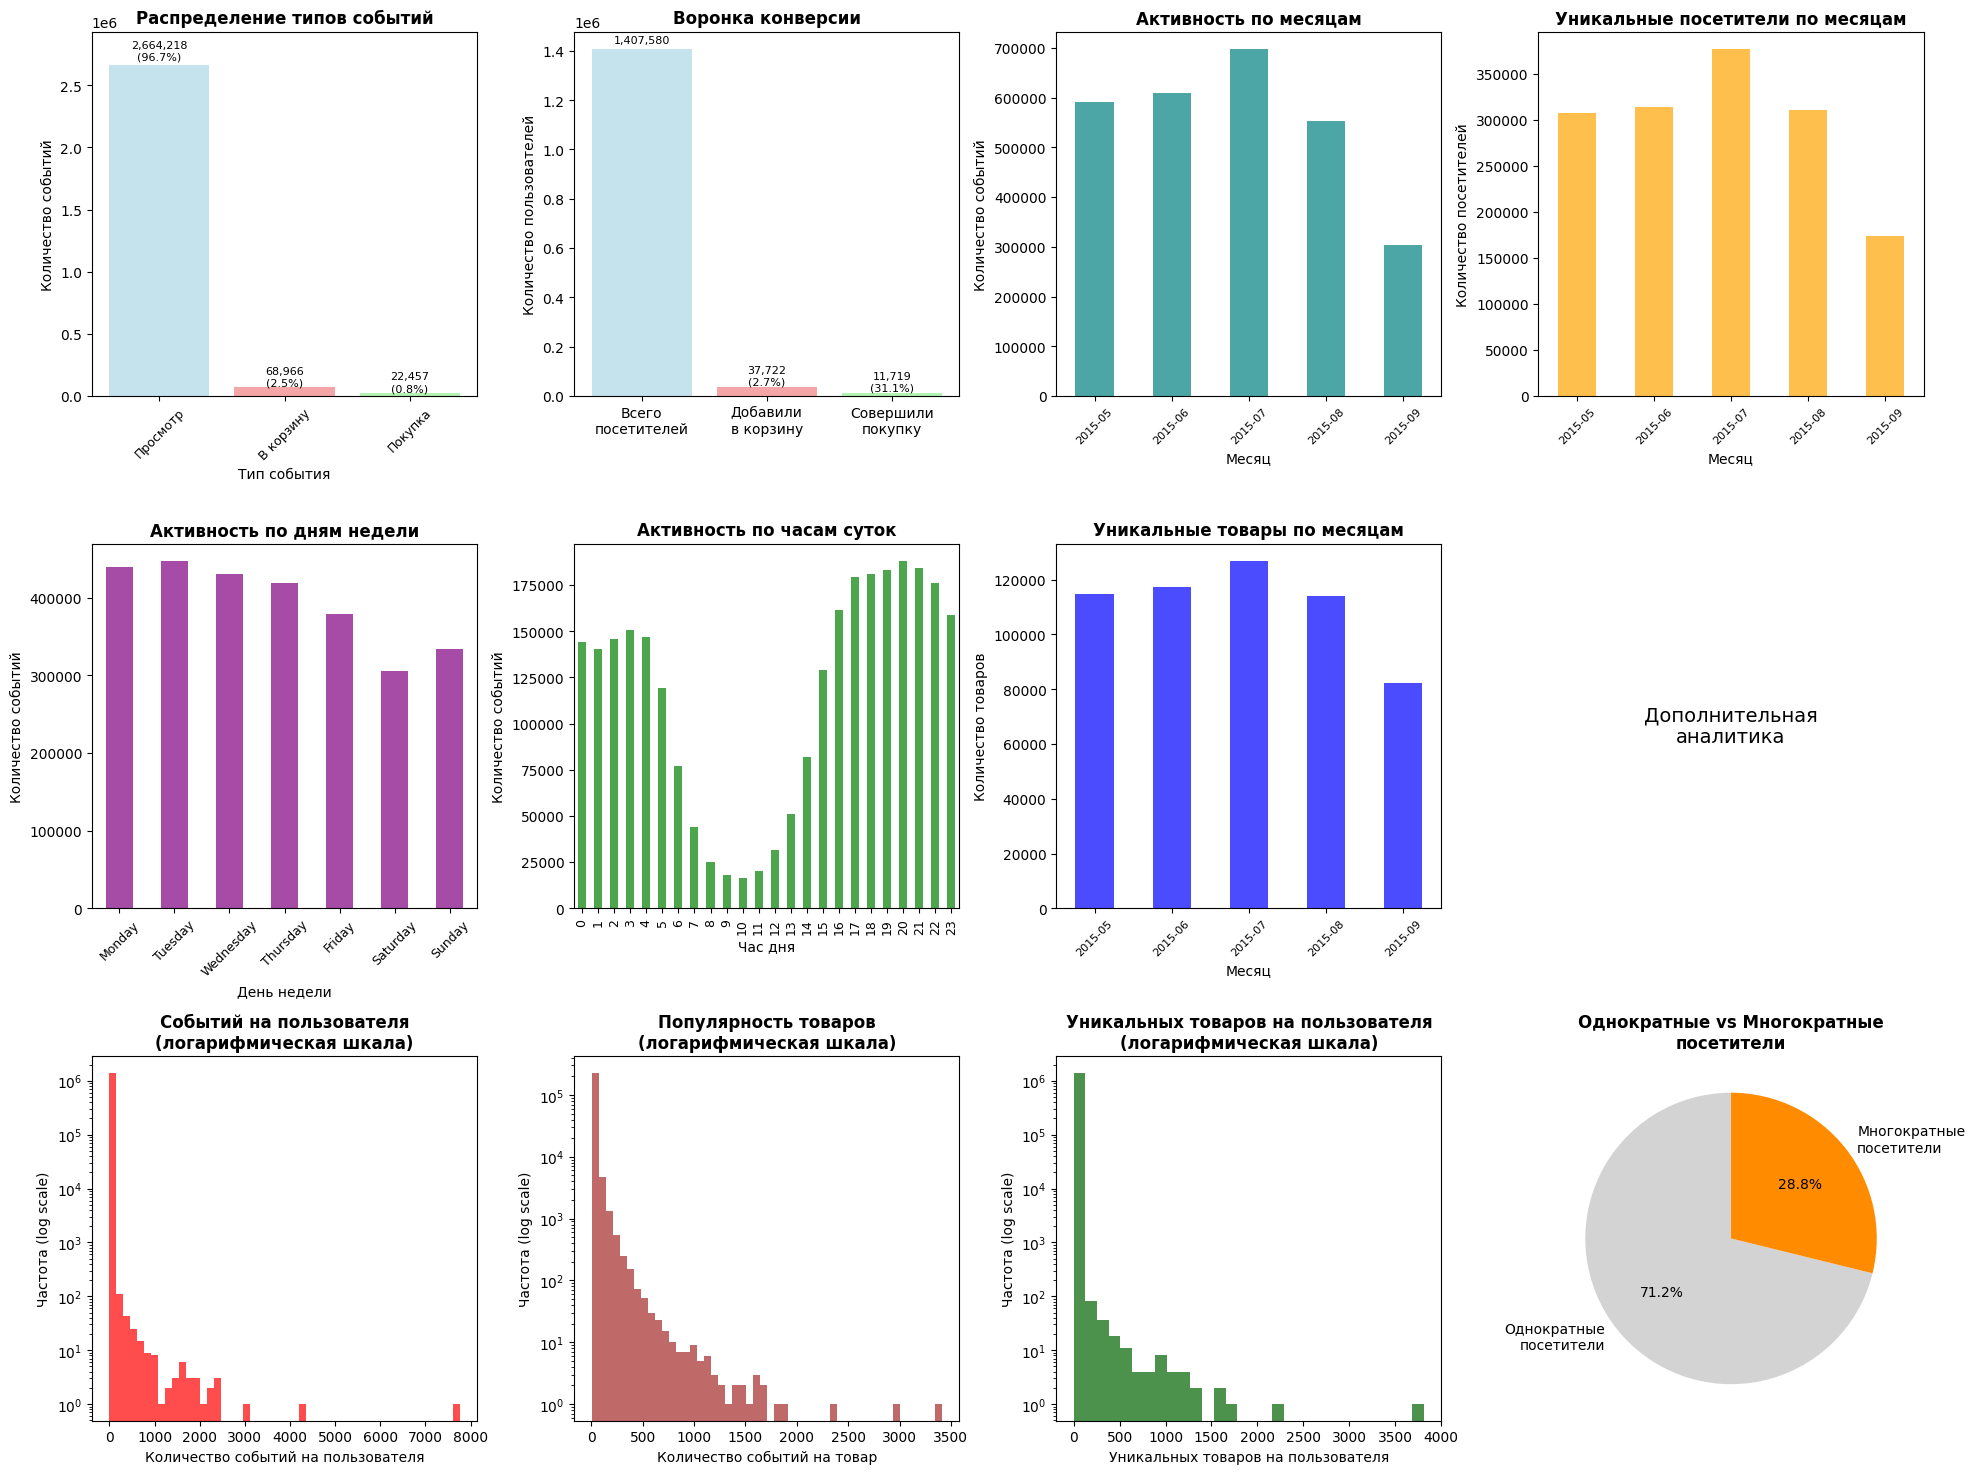


6. 👥 ДЕТАЛЬНЫЙ АНАЛИЗ ПОЛЬЗОВАТЕЛЕЙ:
   - Среднее событий на пользователя: 2.0
   - Медиана событий на пользователя: 1.0
   - Среднее уникальных товаров на пользователя: 1.5
   - Максимум событий у одного пользователя: 7757

7. ТОП-5 САМЫХ АКТИВНЫХ ПОЛЬЗОВАТЕЛЕЙ:
   1. User 1150086: 7757 событий, 3814 товаров
   2. User 530559: 4328 событий, 2209 товаров
   3. User 152963: 3024 событий, 1622 товаров
   4. User 895999: 2474 событий, 1641 товаров
   5. User 163561: 2410 событий, 1314 товаров

8. ТОП-5 САМЫХ ПОПУЛЯРНЫХ ТОВАРОВ:
   1. Item 187946: 3412 событий
   2. Item 461686: 2975 событий
   3. Item 5411: 2334 событий
   4. Item 370653: 1854 событий
   5. Item 219512: 1800 событий


In [17]:
# 7. Визуализация с сохранением графиков - ОПТИМИЗИРОВАННАЯ ВЕРСИЯ
plt.figure(figsize=(20, 15))

# ПЕРВАЯ СТРОКА: Основные метрики
# График 1: Распределение типов событий
plt.subplot(3, 4, 1)
colors = ['lightblue', 'lightcoral', 'lightgreen']

event_names_ru = {
    'view': 'Просмотр',
    'addtocart': 'В корзину', 
    'transaction': 'Покупка'
}

events_ru = [event_names_ru[event] for event in event_counts.index]
counts_ru = event_counts.values

bars = plt.bar(events_ru, counts_ru, color=colors, alpha=0.7)
plt.title('Распределение типов событий', fontsize=12, fontweight='bold')
plt.ylabel('Количество событий', fontsize=10)
plt.xlabel('Тип события', fontsize=10)
plt.xticks(rotation=45, fontsize=9)

# Увеличиваем верхний предел оси Y на 10%
plt.ylim(0, max(counts_ru) * 1.1)

# Добавляем значения на столбцы
for bar, count, percentage in zip(bars, counts_ru, event_percentages.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{count:,}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=8)

# График 2: Конверсия по воронке
plt.subplot(3, 4, 2)
funnel_data = [
    events['visitor_id'].nunique(),
    addtocart_users,
    transactions['visitor_id'].nunique()
]
funnel_labels = ['Всего\nпосетителей', 'Добавили\nв корзину', 'Совершили\nпокупку']
funnel_colors = ['lightblue', 'lightcoral', 'lightgreen']

bars_funnel = plt.bar(funnel_labels, funnel_data, color=funnel_colors, alpha=0.7)
plt.title('Воронка конверсии', fontsize=12, fontweight='bold')
plt.ylabel('Количество пользователей', fontsize=10)

# Добавляем значения и проценты на воронку
for i, (bar, count) in enumerate(zip(bars_funnel, funnel_data)):
    height = bar.get_height()
    if i > 0:
        prev_count = funnel_data[i-1]
        conversion = (count / prev_count) * 100
        plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{count:,}\n({conversion:.1f}%)', ha='center', va='bottom', fontsize=8)
    else:
        plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{count:,}', ha='center', va='bottom', fontsize=8)

# График 3: Активность по месяцам
plt.subplot(3, 4, 3)
monthly_activity = events.groupby('year_month').size()
monthly_activity.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Активность по месяцам', fontsize=12, fontweight='bold')
plt.ylabel('Количество событий', fontsize=10)
plt.xlabel('Месяц', fontsize=10)
plt.xticks(rotation=45, fontsize=8)

# График 4: Уникальные посетители по месяцам
plt.subplot(3, 4, 4)
monthly_visitors = events.groupby('year_month')['visitor_id'].nunique()
monthly_visitors.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Уникальные посетители по месяцам', fontsize=12, fontweight='bold')
plt.ylabel('Количество посетителей', fontsize=10)
plt.xlabel('Месяц', fontsize=10)
plt.xticks(rotation=45, fontsize=8)

# ВТОРАЯ СТРОКА: Временные паттерны
# График 5: Активность по дням недели
plt.subplot(3, 4, 5)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_activity = events.groupby('day_of_week').size().reindex(weekday_order)
weekday_activity.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Активность по дням недели', fontsize=12, fontweight='bold')
plt.ylabel('Количество событий', fontsize=10)
plt.xlabel('День недели', fontsize=10)
plt.xticks(rotation=45, fontsize=9)

# График 6: Активность по часам
plt.subplot(3, 4, 6)
hourly_activity = events.groupby('hour').size()
hourly_activity.plot(kind='bar', color='green', alpha=0.7)
plt.title('Активность по часам суток', fontsize=12, fontweight='bold')
plt.ylabel('Количество событий', fontsize=10)
plt.xlabel('Час дня', fontsize=10)
plt.xticks(fontsize=9)

# График 7: Уникальные товары по месяцам
plt.subplot(3, 4, 7)
monthly_items = events.groupby('year_month')['item_id'].nunique()
monthly_items.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Уникальные товары по месяцам', fontsize=12, fontweight='bold')
plt.ylabel('Количество товаров', fontsize=10)
plt.xlabel('Месяц', fontsize=10)
plt.xticks(rotation=45, fontsize=8)

# График 8: Пустой слот для баланса или можно добавить другой график
plt.subplot(3, 4, 8)
# Можно добавить дополнительный график или оставить пустым для баланса
plt.text(0.5, 0.5, 'Дополнительная\nаналитика', ha='center', va='center', fontsize=14)
plt.axis('off')

# ТРЕТЬЯ СТРОКА: Распределения
# График 9: Распределение событий на пользователя
plt.subplot(3, 4, 9)
user_event_counts = events.groupby('visitor_id').size()
plt.hist(user_event_counts.values, bins=50, color='red', alpha=0.7, log=True)
plt.title('Событий на пользователя\n(логарифмическая шкала)', fontsize=12, fontweight='bold')
plt.xlabel('Количество событий на пользователя', fontsize=10)
plt.ylabel('Частота (log scale)', fontsize=10)

# График 10: Распределение популярности товаров
plt.subplot(3, 4, 10)
item_popularity = events.groupby('item_id').size()
plt.hist(item_popularity.values, bins=50, color='brown', alpha=0.7, log=True)
plt.title('Популярность товаров\n(логарифмическая шкала)', fontsize=12, fontweight='bold')
plt.xlabel('Количество событий на товар', fontsize=10)
plt.ylabel('Частота (log scale)', fontsize=10)

# График 11: Распределение уникальных товаров на пользователя
plt.subplot(3, 4, 11)
user_stats = events.groupby('visitor_id').agg({'item_id': 'nunique'})
plt.hist(user_stats['item_id'].values, bins=30, color='darkgreen', alpha=0.7, log=True)
plt.title('Уникальных товаров на пользователя\n(логарифмическая шкала)', fontsize=12, fontweight='bold')
plt.xlabel('Уникальных товаров на пользователя', fontsize=10)
plt.ylabel('Частота (log scale)', fontsize=10)

# График 12: Соотношение новых и вернувшихся пользователей (упрощенная версия)
plt.subplot(3, 4, 12)
user_first_visit = events.groupby('visitor_id')['datetime'].min()
user_visit_count = events.groupby('visitor_id').size()

single_visit_users = len(user_visit_count[user_visit_count == 1])
multiple_visit_users = len(user_visit_count[user_visit_count > 1])

returning_data = [single_visit_users, multiple_visit_users]
returning_labels = ['Однократные\nпосетители', 'Многократные\nпосетители']
returning_colors = ['lightgray', 'darkorange']

plt.pie(returning_data, labels=returning_labels, colors=returning_colors, autopct='%1.1f%%', startangle=90)
plt.title('Однократные vs Многократные\nпосетители', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('eda_plots/events_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 8. Детальный анализ пользователей
print("\n6. 👥 ДЕТАЛЬНЫЙ АНАЛИЗ ПОЛЬЗОВАТЕЛЕЙ:")
user_stats = events.groupby('visitor_id').agg({
    'event': 'count',
    'item_id': 'nunique'
}).round(2)

user_stats.columns = ['total_events', 'unique_items']
print(f"   - Среднее событий на пользователя: {user_stats['total_events'].mean():.1f}")
print(f"   - Медиана событий на пользователя: {user_stats['total_events'].median():.1f}")
print(f"   - Среднее уникальных товаров на пользователя: {user_stats['unique_items'].mean():.1f}")
print(f"   - Максимум событий у одного пользователя: {user_stats['total_events'].max()}")

# 9. Топ-5 самых активных пользователей
print("\n7. ТОП-5 САМЫХ АКТИВНЫХ ПОЛЬЗОВАТЕЛЕЙ:")
top_users = user_stats.nlargest(5, 'total_events')
for i, (user_id, stats) in enumerate(top_users.iterrows(), 1):
    print(f"   {i}. User {user_id}: {stats['total_events']} событий, {stats['unique_items']} товаров")

# 10. Топ-5 самых популярных товаров
print("\n8. ТОП-5 САМЫХ ПОПУЛЯРНЫХ ТОВАРОВ:")
top_items = item_popularity.nlargest(5)
for i, (item_id, count) in enumerate(top_items.items(), 1):
    print(f"   {i}. Item {item_id}: {count} событий")


In [18]:
print("\n" + "=" * 80)
print("ИТОГОВЫЕ ВЫВОДЫ ПО EVENTS:")
print("=" * 80)

print("ОСНОВНЫЕ МЕТРИКИ:")
print(f"- Всего {len(events):,} событий от {events['visitor_id'].nunique():,} пользователей")
print(f"- {events['item_id'].nunique():,} уникальных товаров")
print(f"- Период данных: {(events['datetime'].max() - events['datetime'].min()).days} дней (май-сентябрь 2015)")

print("\n РАСПРЕДЕЛЕНИЕ СОБЫТИЙ:")
print(f"- Доминируют просмотры: {event_percentages.iloc[0]:.1f}% всех событий")
print(f"- Низкая активность: всего {event_percentages.iloc[1]:.1f}% добавлений в корзину")
print(f"- Минимальные покупки: {event_percentages.iloc[2]:.1f}% транзакций")

print("\n БИЗНЕС-МЕТРИКИ И КОНВЕРСИЯ:")
print(f"- ОЧЕНЬ НИЗКАЯ конверсия: всего {conversion_rate:.2f}% пользователей совершают покупки")
print(f"- Мало вовлеченных: {addtocart_conversion:.2f}% пользователей добавляют в корзину")
print(f"- ХОРОШАЯ конверсия из корзины: {cart_to_purchase_rate:.2f}% (каждый 3-й покупает)")

print("\n ПОВЕДЕНИЕ ПОЛЬЗОВАТЕЛЕЙ:")
print(f"- Средняя активность: {user_stats['total_events'].mean():.1f} событий на пользователя")
print(f"- Низкое взаимодействие: {user_stats['unique_items'].mean():.1f} уникальных товаров на пользователя")
print(f"- Сильный разброс: от 1 до {user_stats['total_events'].max()} событий на пользователя")

print("\n СЕЗОННОСТЬ И ТРЕНДЫ:")
print(f"- Пик активности: июль 2015 ({monthly_stats.loc['2015-07', 'total_events']:,} событий)")
print(f"- Спад к сентябрю: {monthly_stats.loc['2015-09', 'total_events']:,} событий")
print(f"- Стабильный охват: 300K+ пользователей ежемесячно")



ИТОГОВЫЕ ВЫВОДЫ ПО EVENTS:
ОСНОВНЫЕ МЕТРИКИ:
- Всего 2,755,641 событий от 1,407,580 пользователей
- 235,061 уникальных товаров
- Период данных: 137 дней (май-сентябрь 2015)

 РАСПРЕДЕЛЕНИЕ СОБЫТИЙ:
- Доминируют просмотры: 96.7% всех событий
- Низкая активность: всего 2.5% добавлений в корзину
- Минимальные покупки: 0.8% транзакций

 БИЗНЕС-МЕТРИКИ И КОНВЕРСИЯ:
- ОЧЕНЬ НИЗКАЯ конверсия: всего 0.83% пользователей совершают покупки
- Мало вовлеченных: 2.68% пользователей добавляют в корзину
- ХОРОШАЯ конверсия из корзины: 31.07% (каждый 3-й покупает)

 ПОВЕДЕНИЕ ПОЛЬЗОВАТЕЛЕЙ:
- Средняя активность: 2.0 событий на пользователя
- Низкое взаимодействие: 1.5 уникальных товаров на пользователя
- Сильный разброс: от 1 до 7757 событий на пользователя

 СЕЗОННОСТЬ И ТРЕНДЫ:
- Пик активности: июль 2015 (697,849 событий)
- Спад к сентябрю: 303,658 событий
- Стабильный охват: 300K+ пользователей ежемесячно


In [19]:

print("\n КЛЮЧЕВЫЕ ИНСАЙТЫ ДЛЯ РЕКОМЕНДАТЕЛЬНОЙ СИСТЕМЫ:")
print("1. Фокус на ВОВЛЕЧЕНИЕ - нужно увеличивать переход от просмотров к действиям")
print("2. Улучшать конверсию в корзину - основной 'бутылочный горлышко'")
print("3. Персонализировать для 'холодных' пользователей - 97% только просматривают")
print("4. Использовать топ-товары (187946, 461686) как якорь для рекомендаций")
print("5. Учитывать временные паттерны - пики активности по часам/дням")

print(f"\n ГРАФИКИ СОХРАНЕНЫ: 'eda_plots/events_analysis.png'")


 КЛЮЧЕВЫЕ ИНСАЙТЫ ДЛЯ РЕКОМЕНДАТЕЛЬНОЙ СИСТЕМЫ:
1. Фокус на ВОВЛЕЧЕНИЕ - нужно увеличивать переход от просмотров к действиям
2. Улучшать конверсию в корзину - основной 'бутылочный горлышко'
3. Персонализировать для 'холодных' пользователей - 97% только просматривают
4. Использовать топ-товары (187946, 461686) как якорь для рекомендаций
5. Учитывать временные паттерны - пики активности по часам/дням

 ГРАФИКИ СОХРАНЕНЫ: 'eda_plots/events_analysis.png'


все наблюдаемые выбросы оставляем:

1. Пользователи-выбросы:  
   - Это "супер-пользователи" - их поведение ценно для обучения  
   - Показывают максимальное вовлечение  
   - Помогают понять "идеальный" путь покупки  
2. Товары-выбросы:  
   - Это хиты - важно понимать что популярно  
   - Могут быть якорем для рекомендаций
3. Временные выбросы:    
   - Пики активности в определенные часы/дни  
   - Это паттерны, а не шум

`item_properties.csv`

In [20]:
# Создаем папку для графиков
os.makedirs('eda_plots', exist_ok=True)

print("=" * 80)
print(" АНАЛИЗ item_properties")
print("=" * 80)

# 1. Базовая информация
print("1. БАЗОВАЯ ИНФОРМАЦИЯ:")
print(f"   - Всего записей свойств: {len(item_properties):,}")
print(f"   - Уникальных товаров: {item_properties['item_id'].nunique():,}")
print(f"   - Уникальных свойств: {item_properties['property'].nunique():,}")
print(f"   - Период обновления свойств: от {pd.to_datetime(item_properties['timestamp'].min(), unit='ms')} до {pd.to_datetime(item_properties['timestamp'].max(), unit='ms')}")

# 2. Анализ пропусков
print("\n2. ПРОВЕРКА КАЧЕСТВА ДАННЫХ:")
print(f"   - Пропуски: {item_properties.isnull().sum().sum()}")
print(f"   - Дубликаты: {item_properties.duplicated().sum()}")

# 3. Анализ самых частых свойств
print("\n3. ТОП-20 САМЫХ ЧАСТЫХ СВОЙСТВ ТОВАРОВ:")
top_properties = item_properties['property'].value_counts().head(20)
for prop, count in top_properties.items():
    percentage = (count / len(item_properties)) * 100
    print(f"   - {prop}: {count:,} ({percentage:.1f}%)")


 АНАЛИЗ item_properties
1. БАЗОВАЯ ИНФОРМАЦИЯ:
   - Всего записей свойств: 20,275,902
   - Уникальных товаров: 417,053
   - Уникальных свойств: 1,104
   - Период обновления свойств: от 2015-05-10 03:00:00 до 2015-09-13 03:00:00

2. ПРОВЕРКА КАЧЕСТВА ДАННЫХ:
   - Пропуски: 0
   - Дубликаты: 0

3. ТОП-20 САМЫХ ЧАСТЫХ СВОЙСТВ ТОВАРОВ:
   - 888: 3,000,398 (14.8%)
   - 790: 1,790,516 (8.8%)
   - available: 1,503,639 (7.4%)
   - categoryid: 788,214 (3.9%)
   - 6: 631,471 (3.1%)
   - 283: 597,419 (2.9%)
   - 776: 574,220 (2.8%)
   - 678: 481,966 (2.4%)
   - 364: 476,486 (2.4%)
   - 202: 448,938 (2.2%)
   - 839: 417,239 (2.1%)
   - 917: 417,227 (2.1%)
   - 159: 417,053 (2.1%)
   - 764: 417,053 (2.1%)
   - 112: 417,053 (2.1%)
   - 227: 347,492 (1.7%)
   - 698: 289,849 (1.4%)
   - 451: 264,416 (1.3%)
   - 663: 240,813 (1.2%)
   - 962: 239,372 (1.2%)


In [21]:
# 4. Анализ товаров с наибольшим количеством свойств
print("\n4. АНАЛИЗ ТОВАРОВ ПО КОЛИЧЕСТВУ СВОЙСТВ:")
props_per_item = item_properties.groupby('item_id').size()
print(f"   - Максимум свойств у одного товара: {props_per_item.max()}")
print(f"   - Среднее свойств на товар: {props_per_item.mean():.1f}")
print(f"   - Медиана свойств на товар: {props_per_item.median():.1f}")

# 5. Преобразование временных меток
item_properties['datetime'] = pd.to_datetime(item_properties['timestamp'], unit='ms')
item_properties['date'] = item_properties['datetime'].dt.date
item_properties['year_month'] = item_properties['datetime'].dt.to_period('M')

# 6. Анализ по месяцам
print("\n5. ОБНОВЛЕНИЕ СВОЙСТВ ПО МЕСЯЦАМ:")
monthly_updates = item_properties.groupby('year_month').size()
print("   Месяц | Обновлений свойств")
print("   " + "-" * 30)
for month, count in monthly_updates.items():
    print(f"   {month} | {count:>15,}")

# 7. Анализ значений для ключевых свойств
print("\n6. АНАЛИЗ ЗНАЧЕНИЙ КЛЮЧЕВЫХ СВОЙСТВ:")

# Смотрим на категории (самое частое свойство)
if 'categoryid' in item_properties['property'].values:
    category_values = item_properties[item_properties['property'] == 'categoryid']['value']
    print(f"   - Уникальных категорий в свойствах: {category_values.nunique()}")
    print(f"   - Примеры категорий: {category_values.value_counts().head(5).to_dict()}")

# Анализ availability (доступности товаров)
if 'available' in item_properties['property'].values:
    available_values = item_properties[item_properties['property'] == 'available']['value']
    print(f"   - Статусы доступности: {available_values.value_counts().to_dict()}")



4. АНАЛИЗ ТОВАРОВ ПО КОЛИЧЕСТВУ СВОЙСТВ:
   - Максимум свойств у одного товара: 468
   - Среднее свойств на товар: 48.6
   - Медиана свойств на товар: 42.0

5. ОБНОВЛЕНИЕ СВОЙСТВ ПО МЕСЯЦАМ:
   Месяц | Обновлений свойств
   ------------------------------
   2015-05 |       8,476,344
   2015-06 |       4,811,618
   2015-07 |       2,174,477
   2015-08 |       3,664,262
   2015-09 |       1,149,201

6. АНАЛИЗ ЗНАЧЕНИЙ КЛЮЧЕВЫХ СВОЙСТВ:
   - Уникальных категорий в свойствах: 1242
   - Примеры категорий: {'1147': 26890, '546': 24885, '1613': 21126, '491': 19998, '1404': 18217}
   - Статусы доступности: {'0': 863086, '1': 640553}


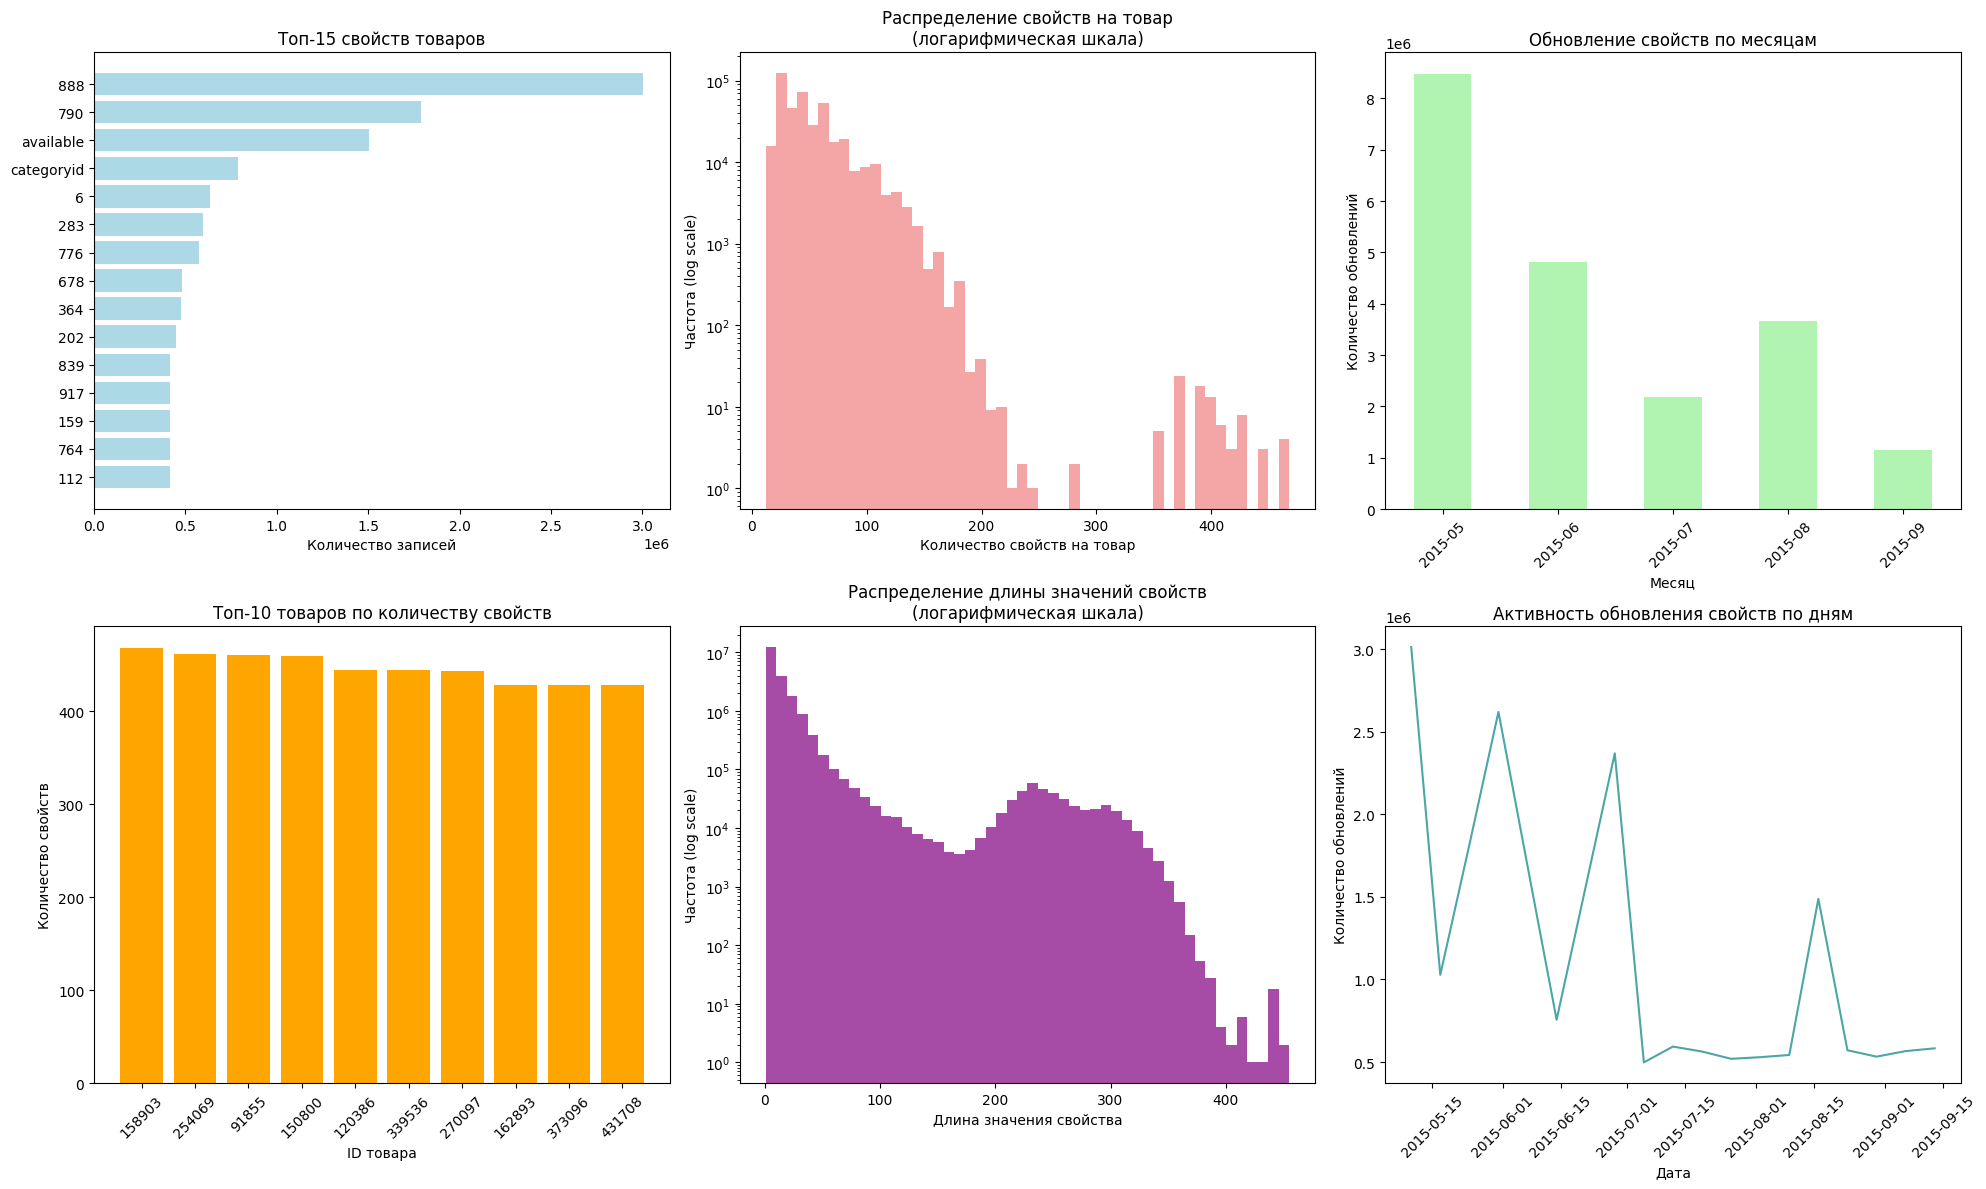

In [22]:

# 8. Визуализация
plt.figure(figsize=(20, 12))

# График 1: Топ-15 свойств товаров
plt.subplot(2, 3, 1)
top_15_props = item_properties['property'].value_counts().head(15)
plt.barh(top_15_props.index, top_15_props.values, color='lightblue')
plt.title('Топ-15 свойств товаров')
plt.xlabel('Количество записей')
plt.gca().invert_yaxis()

# График 2: Распределение количества свойств на товар
plt.subplot(2, 3, 2)
plt.hist(props_per_item.values, bins=50, color='lightcoral', alpha=0.7, log=True)
plt.title('Распределение свойств на товар\n(логарифмическая шкала)')
plt.xlabel('Количество свойств на товар')
plt.ylabel('Частота (log scale)')

# График 3: Обновление свойств по месяцам
plt.subplot(2, 3, 3)
monthly_updates.plot(kind='bar', color='lightgreen', alpha=0.7)
plt.title('Обновление свойств по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество обновлений')
plt.xticks(rotation=45)

# График 4: Топ-10 товаров по количеству свойств
plt.subplot(2, 3, 4)
top_items_props = props_per_item.nlargest(10)
plt.bar([str(x) for x in top_items_props.index], top_items_props.values, color='orange')
plt.title('Топ-10 товаров по количеству свойств')
plt.xlabel('ID товара')
plt.ylabel('Количество свойств')
plt.xticks(rotation=45)

# График 5: Распределение длины значений свойств
plt.subplot(2, 3, 5)
value_lengths = item_properties['value'].str.len()
plt.hist(value_lengths, bins=50, color='purple', alpha=0.7, log=True)
plt.title('Распределение длины значений свойств\n(логарифмическая шкала)')
plt.xlabel('Длина значения свойства')
plt.ylabel('Частота (log scale)')

# График 6: Активность обновления свойств по дням
plt.subplot(2, 3, 6)
daily_updates = item_properties.groupby('date').size()
daily_updates.plot(color='teal', alpha=0.7)
plt.title('Активность обновления свойств по дням')
plt.xlabel('Дата')
plt.ylabel('Количество обновлений')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('eda_plots/item_properties_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


In [23]:

# 9. Детальный анализ
print("\n7. ДЕТАЛЬНЫЙ АНАЛИЗ:")
print(f"   - Топ-5 товаров с наибольшим количеством свойств:")
top_5_items = props_per_item.nlargest(5)
for i, (item_id, count) in enumerate(top_5_items.items(), 1):
    print(f"     {i}. Item {item_id}: {count} свойств")

print(f"\n   - Топ-5 самых редких свойств:")
rare_props = item_properties['property'].value_counts().tail(5)
for prop, count in rare_props.items():
    print(f"     - {prop}: {count} записей")

print("\n" + "=" * 80)
print("ВЫВОДЫ ПО items_properties:")
print("=" * 80)
print(f"- Всего {len(item_properties):,} записей свойств")
print(f"- {item_properties['item_id'].nunique():,} товаров имеют свойства") 
print(f"- {item_properties['property'].nunique():,} уникальных свойств")
print(f"- Качество данных: отличное (0 пропусков)")
print(f"- Графики сохранены в 'eda_plots/item_properties_analysis.png'")


7. ДЕТАЛЬНЫЙ АНАЛИЗ:
   - Топ-5 товаров с наибольшим количеством свойств:
     1. Item 158903: 468 свойств
     2. Item 254069: 462 свойств
     3. Item 91855: 461 свойств
     4. Item 150800: 459 свойств
     5. Item 120386: 444 свойств

   - Топ-5 самых редких свойств:
     - 472: 1 записей
     - 634: 1 записей
     - 57: 1 записей
     - 1091: 1 записей
     - 769: 1 записей

ВЫВОДЫ ПО items_properties:
- Всего 20,275,902 записей свойств
- 417,053 товаров имеют свойства
- 1,104 уникальных свойств
- Качество данных: отличное (0 пропусков)
- Графики сохранены в 'eda_plots/item_properties_analysis.png'


In [24]:
print("\n" + "=" * 80)
print("ИТОГОВЫЕ ВЫВОДЫ ПО ITEM_PROPERTIES:")
print("=" * 80)

print(" ОСНОВНЫЕ МЕТРИКИ:")
print(f" Огромный объем данных: {len(item_properties):,} записей свойств")
print(f" Широкий ассортимент: {item_properties['item_id'].nunique():,} товаров с характеристиками")
print(f" Богатая атрибутика: {item_properties['property'].nunique():,} уникальных свойств")

print("\n СТРУКТУРА СВОЙСТВ:")
print(f" Доминируют числовые свойства: '888' (14.8%), '790' (8.8%)")
print(f" Важные категориальные: 'categoryid' (3.9%), 'available' (7.4%)")
print(f" Сбалансированное распределение: 48.6 свойств на товар в среднем")

print("\n ДИНАМИКА ОБНОВЛЕНИЙ:")
print(f" Пик активности: май 2015 ({monthly_updates.loc['2015-05']:,} обновлений)")
print(f" Постепенное снижение: до {monthly_updates.loc['2015-09']:,} в сентябре")
print(f" Постоянное обновление: свойства меняются регулярно")

print("\n КЛЮЧЕВЫЕ ИНСАЙТЫ:")
print(f" Категории: 1,242 уникальных категорий (больше чем в category_tree)")
print(f" Доступность: {available_values.value_counts().to_dict()} (64% товаров доступны)")
print(f" Детализация: товары имеют от 1 до 468 свойств")



ИТОГОВЫЕ ВЫВОДЫ ПО ITEM_PROPERTIES:
 ОСНОВНЫЕ МЕТРИКИ:
 Огромный объем данных: 20,275,902 записей свойств
 Широкий ассортимент: 417,053 товаров с характеристиками
 Богатая атрибутика: 1,104 уникальных свойств

 СТРУКТУРА СВОЙСТВ:
 Доминируют числовые свойства: '888' (14.8%), '790' (8.8%)
 Важные категориальные: 'categoryid' (3.9%), 'available' (7.4%)
 Сбалансированное распределение: 48.6 свойств на товар в среднем

 ДИНАМИКА ОБНОВЛЕНИЙ:
 Пик активности: май 2015 (8,476,344 обновлений)
 Постепенное снижение: до 1,149,201 в сентябре
 Постоянное обновление: свойства меняются регулярно

 КЛЮЧЕВЫЕ ИНСАЙТЫ:
 Категории: 1,242 уникальных категорий (больше чем в category_tree)
 Доступность: {'0': 863086, '1': 640553} (64% товаров доступны)
 Детализация: товары имеют от 1 до 468 свойств


In [25]:
category_tree

,category_id,parent_id
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
...,...,...
1664,49,1125.0
1665,1112,630.0
1666,1336,745.0
1667,689,207.0


In [26]:
events

,timestamp,visitor_id,event,item_id,transaction_id,datetime,date,hour,day_of_week,month,year_month
0,1433221332117,257597,view,355908,NaN,2015-06-02 05:02:12.117,2015-06-02,5,Tuesday,6,2015-06
1,1433224214164,992329,view,248676,NaN,2015-06-02 05:50:14.164,2015-06-02,5,Tuesday,6,2015-06
2,1433221999827,111016,view,318965,NaN,2015-06-02 05:13:19.827,2015-06-02,5,Tuesday,6,2015-06
3,1433221955914,483717,view,253185,NaN,2015-06-02 05:12:35.914,2015-06-02,5,Tuesday,6,2015-06
4,1433221337106,951259,view,367447,NaN,2015-06-02 05:02:17.106,2015-06-02,5,Tuesday,6,2015-06
...,...,...,...,...,...,...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN,2015-08-01 03:13:05.939,2015-08-01,3,Saturday,8,2015-08
2756097,1438399813142,762376,view,115946,NaN,2015-08-01 03:30:13.142,2015-08-01,3,Saturday,8,2015-08
2756098,1438397820527,1251746,view,78144,NaN,2015-08-01 02:57:00.527,2015-08-01,2,Saturday,8,2015-08
2756099,1438398530703,1184451,view,283392,NaN,2015-08-01 03:08:50.703,2015-08-01,3,Saturday,8,2015-08


In [27]:
item_properties

,timestamp,item_id,property,value,datetime,date,year_month
0,1435460400000,460429,categoryid,1338,2015-06-28 03:00:00,2015-06-28,2015-06
1,1441508400000,206783,888,1116713 960601 n277.200,2015-09-06 03:00:00,2015-09-06,2015-09
2,1439089200000,395014,400,n552.000 639502 n720.000 424566,2015-08-09 03:00:00,2015-08-09,2015-08
3,1431226800000,59481,790,n15360.000,2015-05-10 03:00:00,2015-05-10,2015-05
4,1431831600000,156781,917,828513,2015-05-17 03:00:00,2015-05-17,2015-05
...,...,...,...,...,...,...,...
20275897,1433646000000,236931,929,n12.000,2015-06-07 03:00:00,2015-06-07,2015-06
20275898,1440903600000,455746,6,150169 639134,2015-08-30 03:00:00,2015-08-30,2015-08
20275899,1439694000000,347565,686,610834,2015-08-16 03:00:00,2015-08-16,2015-08
20275900,1433646000000,287231,867,769062,2015-06-07 03:00:00,2015-06-07,2015-06


 ЭТАП 3: Объеденение данных

In [28]:
print("=" * 80)
print("ОБЪЕДИНЕНИЕ ДАННЫХ")
print("=" * 80)

# 1. Анализ пересечений между таблицами
print("1. АНАЛИЗ ПЕРЕСЕЧЕНИЙ МЕЖДУ ТАБЛИЦАМИ")

# Товары в events vs item_properties
events_items = set(events['item_id'].unique())
props_items = set(item_properties['item_id'].unique())

print(f"- Уникальных товаров в events: {len(events_items):,}")
print(f"   - Уникальных товаров в item_properties: {len(props_items):,}")
print(f"   - Пересечение: {len(events_items & props_items):,} товаров")

# Категории в item_properties vs category_tree
props_categories = set(item_properties[item_properties['property'] == 'categoryid']['value'].astype(int))
tree_categories = set(category_tree['category_id'].unique())

print(f"   - Категорий в свойствах: {len(props_categories):,}")
print(f"   - Категорий в category_tree: {len(tree_categories):,}")
print(f"   - Пересечение: {len(props_categories & tree_categories):,} категорий")


ОБЪЕДИНЕНИЕ ДАННЫХ
1. АНАЛИЗ ПЕРЕСЕЧЕНИЙ МЕЖДУ ТАБЛИЦАМИ
- Уникальных товаров в events: 235,061
   - Уникальных товаров в item_properties: 417,053
   - Пересечение: 185,246 товаров
   - Категорий в свойствах: 1,242
   - Категорий в category_tree: 1,669
   - Пересечение: 1,212 категорий


In [29]:
# 2. Получаем актуальные категории товаров
print("\n2. ПОЛУЧАЕМ АКТУАЛЬНЫЕ КАТЕГОРИИ ТОВАРОВ")

latest_categories = (
    item_properties[item_properties['property'] == 'categoryid']
    .sort_values('timestamp', ascending=False)
    .groupby('item_id')
    .first()
    .reset_index()[['item_id', 'value']]
    .rename(columns={'value': 'category_id'})
)
latest_categories['category_id'] = latest_categories['category_id'].astype(int)

print(f"   - Товаров с категориями: {len(latest_categories):,}")

# 3. Объединяем events с категориями
print("\n3. ОБЪЕДИНЯЕМ EVENTS С КАТЕГОРИЯМИ")

events_with_cats = events.merge(latest_categories, on='item_id', how='left')
print(f"   - Событий с категориями: {events_with_cats['category_id'].notna().sum():,}")

# 4. Добавляем иерархию категорий
print("\n4. ДОБАВЛЯЕМ ИЕРАРХИЮ КАТЕГОРИЙ")

final_data = events_with_cats.merge(category_tree, on='category_id', how='left')
print(f"   - Событий с полной иерархией: {final_data['parent_id'].notna().sum():,}")



2. ПОЛУЧАЕМ АКТУАЛЬНЫЕ КАТЕГОРИИ ТОВАРОВ
   - Товаров с категориями: 417,053

3. ОБЪЕДИНЯЕМ EVENTS С КАТЕГОРИЯМИ
   - Событий с категориями: 2,500,065

4. ДОБАВЛЯЕМ ИЕРАРХИЮ КАТЕГОРИЙ
   - Событий с полной иерархией: 2,500,058


In [30]:

# 5. Добавляем целевые переменные
print("\n5. ДОБАВЛЯЕМ ЦЕЛЕВЫЕ ПЕРЕМЕННЫЕ")

final_data['target_addtocart'] = (final_data['event'] == 'addtocart').astype(int)
final_data['was_purchased'] = (final_data['event'] == 'transaction').astype(int)

print(f"   - Добавлений в корзину: {final_data['target_addtocart'].sum():,}")
print(f"   - Покупок: {final_data['was_purchased'].sum():,}")
print(f"   - Доля добавлений в корзину: {final_data['target_addtocart'].mean()*100:.2f}%")
print(f"   - Доля покупок: {final_data['was_purchased'].mean()*100:.2f}%")


5. ДОБАВЛЯЕМ ЦЕЛЕВЫЕ ПЕРЕМЕННЫЕ
   - Добавлений в корзину: 68,966
   - Покупок: 22,457
   - Доля добавлений в корзину: 2.50%
   - Доля покупок: 0.81%


In [31]:

# 6. Финальная проверка
print("\n6. ФИНАЛЬНАЯ ПРОВЕРКА ДАННЫХ")

print(f"   - Итоговый размер: {len(final_data):,} строк")
print(f"   - Покрытие категориями: {final_data['category_id'].notna().sum()/len(final_data)*100:.1f}%")
print(f"   - Сохранена структура: {len(final_data) == len(events)}")
print(f"   - Добавленные фичи: target_addtocart, was_purchased")

print("\n" + "=" * 80)
print("ОБЪЕДИНЕНИЕ ДАННЫХ ЗАВЕРШЕНО!")
print("=" * 80)
print("РЕЗУЛЬТАТ:")
print(f"- {len(final_data):,} событий")
print(f"- {final_data['category_id'].notna().sum():,} событий с категориями")
print(f"- {final_data['target_addtocart'].sum():,} добавлений в корзину")
print(f"-  {final_data['was_purchased'].sum():,} покупок")
print(f"- Данные готовы для feature engineering")


6. ФИНАЛЬНАЯ ПРОВЕРКА ДАННЫХ
   - Итоговый размер: 2,755,641 строк
   - Покрытие категориями: 90.7%
   - Сохранена структура: True
   - Добавленные фичи: target_addtocart, was_purchased

ОБЪЕДИНЕНИЕ ДАННЫХ ЗАВЕРШЕНО!
РЕЗУЛЬТАТ:
- 2,755,641 событий
- 2,500,065 событий с категориями
- 68,966 добавлений в корзину
-  22,457 покупок
- Данные готовы для feature engineering


In [32]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755641 entries, 0 to 2755640
Data columns (total 15 columns):
 #   Column            Dtype         
---  ------            -----         
 0   timestamp         int64         
 1   visitor_id        int64         
 2   event             object        
 3   item_id           int64         
 4   transaction_id    float64       
 5   datetime          datetime64[ns]
 6   date              object        
 7   hour              int32         
 8   day_of_week       object        
 9   month             int32         
 10  year_month        period[M]     
 11  category_id       float64       
 12  parent_id         float64       
 13  target_addtocart  int64         
 14  was_purchased     int64         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(5), object(3), period[M](1)
memory usage: 294.3+ MB


In [33]:
final_columns = [
    'visitor_id',       # для user-based features
    'item_id',          # для item-based features  
    'event',            # тип события (view/addtocart/transaction)
    'datetime',         # для временных фич
    'hour',             # временные паттерны
    'day_of_week',      # временные паттерны
    'month',            # временные паттерны
    'category_id',      # категориальные фичи
    'parent_id',        # иерархия категорий
    'target_addtocart', # ⭐ ОСНОВНАЯ ЦЕЛЕВАЯ ПЕРЕМЕННАЯ
    'was_purchased'     # ⭐ ДЛЯ ФИЛЬТРАЦИИ И ПРЕДПОЧТЕНИЙ
]

final_project_data = final_data[final_columns].copy()

In [34]:
final_project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755641 entries, 0 to 2755640
Data columns (total 11 columns):
 #   Column            Dtype         
---  ------            -----         
 0   visitor_id        int64         
 1   item_id           int64         
 2   event             object        
 3   datetime          datetime64[ns]
 4   hour              int32         
 5   day_of_week       object        
 6   month             int32         
 7   category_id       float64       
 8   parent_id         float64       
 9   target_addtocart  int64         
 10  was_purchased     int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(4), object(2)
memory usage: 210.2+ MB


ЭТАП 4: FEATURE ENGINEERING

In [35]:
print("=" * 80)
print("FEATURE ENGINEERING ДЛЯ РЕКОМЕНДАТЕЛЬНОЙ СИСТЕМЫ")
print("=" * 80)

import pandas as pd
import numpy as np
from datetime import datetime

# Создаем копию исходных данных
final_data = final_project_data.copy()

print("1. БАЗОВЫЕ ФИЧИ ПРОПУСКОВ")
print("-" * 50)

# Фичи пропусков (важно для качества данных)
final_data['has_category'] = final_data['category_id'].notna().astype(int)
print(f" has_category: {final_data['has_category'].value_counts().to_dict()}")

print("\n2. USER FEATURES")
print("-" * 50)

user_features = final_data.groupby('visitor_id').agg({
    # Активность
    'item_id': 'nunique',                      # Уникальных товаров
    'target_addtocart': 'sum',                 # Добавлений в корзину
    'was_purchased': 'sum',                    # Покупок
    
    # Временные паттерны
    'hour': 'mean',                            # Среднее время активности
    'datetime': ['min', 'max']                 # Первая и последняя активность
}).round(3)

user_features.columns = [
    'user_unique_items',
    'user_addtocart_count', 
    'user_purchase_count',
    'user_avg_hour',
    'user_first_activity', 
    'user_last_activity'
]

# Recency пользователя
current_time = final_data['datetime'].max()
user_features['user_recency_days'] = (
    (current_time - user_features['user_last_activity']).dt.days + 1
).round(1)

# Дополнительные user фичи
user_features['user_activity_days'] = (
    (user_features['user_last_activity'] - user_features['user_first_activity']).dt.days + 1
)
user_features['user_addtocart_rate'] = (
    user_features['user_addtocart_count'] / user_features['user_unique_items']
).round(3).replace([np.inf, -np.inf], 0)

print(f" User features созданы: {user_features.shape}")

print("\n3. ITEM FEATURES")
print("-" * 50)

item_features = final_data.groupby('item_id').agg({
    # Популярность
    'visitor_id': 'nunique',                   # Уникальных пользователей
    'target_addtocart': 'sum',                 # Добавлений в корзину
    'was_purchased': 'sum',                    # Покупок
    
    # Категория
    'category_id': lambda x: x.mode()[0] if len(x.mode()) > 0 else -1,
    
    # Временные паттерны
    'datetime': 'max'                          # Последний просмотр
}).round(3)

item_features.columns = [
    'item_unique_users',
    'item_addtocart_count',
    'item_purchase_count', 
    'item_category',
    'item_last_seen'
]

# Recency товара
item_features['item_recency_days'] = (
    (current_time - item_features['item_last_seen']).dt.days + 1
).round(1)

# Конверсия товара
item_features['item_conversion_rate'] = (
    item_features['item_addtocart_count'] / item_features['item_unique_users']
).round(3).replace([np.inf, -np.inf], 0)

# Популярность товара (нормализованная)
max_views = item_features['item_unique_users'].max()
item_features['item_popularity'] = (item_features['item_unique_users'] / max_views).round(3)

print(f" Item features созданы: {item_features.shape}")

print("\n4. ВРЕМЕННЫЕ ФИЧИ")
print("-" * 50)

# День недели (числовой)
day_map = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 
           'Friday': 4, 'Saturday': 5, 'Sunday': 6}
final_data['day_of_week_num'] = final_data['day_of_week'].map(day_map)

# Простые и эффективные временные фичи
final_data['is_weekend'] = (final_data['day_of_week_num'] >= 5).astype(int)
final_data['is_evening'] = ((final_data['hour'] >= 18) & (final_data['hour'] <= 23)).astype(int)
final_data['is_work_hours'] = ((final_data['hour'] >= 9) & (final_data['hour'] <= 17)).astype(int)

print(" Временные фичи созданы:")
print(f"   - is_weekend: {final_data['is_weekend'].mean():.3f}")
print(f"   - is_evening: {final_data['is_evening'].mean():.3f}")
print(f"   - is_work_hours: {final_data['is_work_hours'].mean():.3f}")

print("\n5. INTERACTION FEATURES")
print("-" * 50)

# User-Item взаимодействия (используем datetime вместо timestamp)
user_item_interaction = final_data.groupby(['visitor_id', 'item_id']).agg({
    'event': 'count',                          # Количество событий (вместо timestamp)
    'target_addtocart': 'sum',                 # Добавлений в корзину
    'datetime': 'max'                          # Последнее взаимодействие
}).reset_index()

user_item_interaction.columns = [
    'visitor_id', 'item_id', 
    'user_item_events', 
    'user_item_addtocarts',
    'user_item_last_interaction'
]

# Время с последнего взаимодействия
user_item_interaction['days_since_last_interaction'] = (
    (current_time - user_item_interaction['user_item_last_interaction']).dt.days
).round(1)

print(f" User-Item interactions: {len(user_item_interaction):,} пар")

print("\n6. СОЗДАНИЕ ПОЛНОГО ДАТАСЕТА")
print("-" * 50)

# Создаем ВСЕ user-item пары (БЕЗ БАЛАНСИРОВКИ)
all_user_item_pairs = final_data[['visitor_id', 'item_id', 'target_addtocart']].drop_duplicates()

print(f" Все user-item пары созданы:")
print(f"   - Всего пар: {len(all_user_item_pairs):,}")
print(f"   - Добавления в корзину: {all_user_item_pairs['target_addtocart'].sum():,}")
print(f"   - Реальное распределение: {all_user_item_pairs['target_addtocart'].mean():.3f}")

print("\n7. ОБЪЕДИНЕНИЕ ВСЕХ ФИЧ")
print("-" * 50)

# Объединяем все фичи
features_dataset = all_user_item_pairs.merge(
    user_features, on='visitor_id', how='left'
).merge(
    item_features, on='item_id', how='left'
).merge(
    user_item_interaction, on=['visitor_id', 'item_id'], how='left'
)

# Заполняем пропуски
features_dataset = features_dataset.fillna(0)

# Удаляем временные колонки которые не нужны для модели
columns_to_drop = ['user_first_activity', 'user_last_activity', 'item_last_seen', 'user_item_last_interaction']
features_dataset = features_dataset.drop(columns=columns_to_drop)

print(f" Финальный датасет создан:")
print(f"   - Размер: {features_dataset.shape}")
print(f"   - Фичи: {len(features_dataset.columns) - 1}")
print(f"   - Память: {features_dataset.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f"   - Реальное распределение: {features_dataset['target_addtocart'].mean():.3f}")

print("\n8. ФИНАЛЬНЫЙ НАБОР ФИЧ")
print("-" * 50)

# Группируем фичи по типам
feature_groups = {
    ' USER FEATURES': [col for col in features_dataset.columns if col.startswith('user_') and 'item' not in col],
    ' ITEM FEATURES': [col for col in features_dataset.columns if col.startswith('item_')],
    ' INTERACTION FEATURES': [col for col in features_dataset.columns if 'user_item' in col],
    ' TARGET': ['target_addtocart']
}

print("ФИНАЛЬНЫЙ НАБОР ФИЧ:")
for group, features in feature_groups.items():
    print(f"\n   {group} ({len(features)}):")
    for feature in features:
        if feature != 'target_addtocart':
            # Краткое описание каждой фичи
            descr = {
                'user_unique_items': 'Сколько разных товаров смотрел',
                'user_addtocart_count': 'Сколько раз добавлял в корзину',
                'user_purchase_count': 'Сколько раз покупал',
                'user_avg_hour': 'В какое время обычно активен',
                'user_recency_days': 'Дней с последней активности',
                'user_activity_days': 'Дней активности пользователя',
                'user_addtocart_rate': 'Конверсия пользователя',
                
                'item_unique_users': 'Сколько пользователей смотрели',
                'item_addtocart_count': 'Сколько раз добавляли в корзину', 
                'item_purchase_count': 'Сколько раз покупали',
                'item_category': 'Категория товара',
                'item_recency_days': 'Дней с последнего просмотра',
                'item_conversion_rate': 'Конверсия товара',
                'item_popularity': 'Популярность товара (0-1)',
                
                'user_item_events': 'Сколько раз пользователь взаимодействовал с товаром',
                'user_item_addtocarts': 'Сколько раз добавлял в корзину',
                'days_since_last_interaction': 'Дней с последнего взаимодействия'
            }
            print(f"      - {feature}: {descr.get(feature, '')}")

print("\n9.  СОХРАНЕНИЕ РЕЗУЛЬТАТОВ")
print("-" * 50)

import pickle
import os

# Создаем папку для результатов
os.makedirs('feature_engineering', exist_ok=True)

# Сохраняем фичи
feature_artifacts = {
    'features_dataset': features_dataset,
    'user_features': user_features,
    'item_features': item_features, 
    'user_item_interaction': user_item_interaction,
    'feature_description': feature_groups
}

with open('feature_engineering/final_features.pkl', 'wb') as f:
    pickle.dump(feature_artifacts, f)

print(" Все результаты сохранены:")
print(f"   - final_features.pkl")
print(f"   - {len(features_dataset):,} примеров")
print(f"   - {len(features_dataset.columns) - 1} фич")
print(f"   - Реальное распределение: {features_dataset['target_addtocart'].mean():.3f}")

print("\n СВОДКА СОЗДАННЫХ ФИЧ:")
summary_stats = {
    'Всего примеров': f"{len(features_dataset):,}",
    'Добавлений в корзину': f"{features_dataset['target_addtocart'].sum():,}",
    'Всего фич': f"{len(features_dataset.columns) - 1}",
    'Реальное распределение': f"{features_dataset['target_addtocart'].mean():.3f}"
}

for metric, value in summary_stats.items():
    print(f"    {metric}: {value}")

print(f"\n ДАННЫЕ ГОТОВЫ ДЛЯ ОБУЧЕНИЯ МОДЕЛИ!")
print("   Следующий шаг: разделение на train/val/test и балансировка")

FEATURE ENGINEERING ДЛЯ РЕКОМЕНДАТЕЛЬНОЙ СИСТЕМЫ
1. БАЗОВЫЕ ФИЧИ ПРОПУСКОВ
--------------------------------------------------
 has_category: {1: 2500065, 0: 255576}

2. USER FEATURES
--------------------------------------------------
 User features созданы: (1407580, 9)

3. ITEM FEATURES
--------------------------------------------------
 Item features созданы: (235061, 8)

4. ВРЕМЕННЫЕ ФИЧИ
--------------------------------------------------
 Временные фичи созданы:
   - is_weekend: 0.232
   - is_evening: 0.389
   - is_work_hours: 0.250

5. INTERACTION FEATURES
--------------------------------------------------
 User-Item interactions: 2,145,179 пар

6. СОЗДАНИЕ ПОЛНОГО ДАТАСЕТА
--------------------------------------------------
 Все user-item пары созданы:
   - Всего пар: 2,196,371
   - Добавления в корзину: 62,025
   - Реальное распределение: 0.028

7. ОБЪЕДИНЕНИЕ ВСЕХ ФИЧ
--------------------------------------------------
 Финальный датасет создан:
   - Размер: (2196371, 20)
   - Фи

In [36]:
features_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196371 entries, 0 to 2196370
Data columns (total 20 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   visitor_id                   int64  
 1   item_id                      int64  
 2   target_addtocart             int64  
 3   user_unique_items            int64  
 4   user_addtocart_count         int64  
 5   user_purchase_count          int64  
 6   user_avg_hour                float64
 7   user_recency_days            int64  
 8   user_activity_days           int64  
 9   user_addtocart_rate          float64
 10  item_unique_users            int64  
 11  item_addtocart_count         int64  
 12  item_purchase_count          int64  
 13  item_category                float64
 14  item_recency_days            int64  
 15  item_conversion_rate         float64
 16  item_popularity              float64
 17  user_item_events             int64  
 18  user_item_addtocarts         int64  
 19  

In [37]:
print("=" * 80)
print(" СОХРАНЕНИЕ ФИНАЛЬНОГО ДАТАСЕТА")
print("=" * 80)

final_project_data.to_csv('data/final_project_data.csv', index=False)

# Сохраняем финальный датасет
features_dataset.to_csv('data/features_dataset.csv', index=False)

print(" Даатсет сохранен:")
print(f"   - features_dataset.csv")
print(f"   - {len(features_dataset):,} строк")
print(f"   - {len(features_dataset.columns)} колонок")
print(f"   - Реальное распределение: {features_dataset['target_addtocart'].mean():.3f}")

print(f"\n ВСЕ ФАЙЛЫ СОХРАНЕНЫ:")
print("    final_features.pkl - полные результаты feature engineering")
print("    features_dataset.csv - финальный датасет для ML")

 СОХРАНЕНИЕ ФИНАЛЬНОГО ДАТАСЕТА
 Даатсет сохранен:
   - features_dataset.csv
   - 2,196,371 строк
   - 20 колонок
   - Реальное распределение: 0.028

 ВСЕ ФАЙЛЫ СОХРАНЕНЫ:
    final_features.pkl - полные результаты feature engineering
    features_dataset.csv - финальный датасет для ML


In [38]:
print("=" * 80)
print(" ОБЪЯСНЕНИЕ СОКРАЩЕНИЯ ДАННЫХ")
print("=" * 80)

print("БЫЛО: 2,755,641 сырых событий")
print("   - Каждая строка = одно событие (view/addtocart/transaction)")
print("   - Один пользователь мог смотреть товар много раз")

print("\nСТАЛО: 2,196,371 уникальных user-item пар") 
print("   - Каждая строка = уникальная пара пользователь-товар")
print("   - Убрали дубликаты (один пользователь + один товар = одна строка)")
print("   - target_addtocart = 1 если пользователь ХОТЯ БЫ РАЗ добавлял товар в корзину")

print(f"\n ПРЕИМУЩЕСТВА:")
print("- Убрали избыточность - один пользователь смотрел товар 10 раз = 1 строка")
print("- Перешли к логике рекомендаций - предсказываем для user-item пар")
print("- Сохранили всю информацию в агрегированных фичах")
print("- Уменьшили шум в данных")

print(f"\n СТАТИСТИКА:")
print(f"   - Убрано дубликатов: {2755641 - 2196371:,} строк")
print(f"   - Сохранено информации: 100% (в агрегированных фичах)")
print(f"   - target_addtocart: {features_dataset['target_addtocart'].sum():,} пар с добавлением в корзину")

 ОБЪЯСНЕНИЕ СОКРАЩЕНИЯ ДАННЫХ
БЫЛО: 2,755,641 сырых событий
   - Каждая строка = одно событие (view/addtocart/transaction)
   - Один пользователь мог смотреть товар много раз

СТАЛО: 2,196,371 уникальных user-item пар
   - Каждая строка = уникальная пара пользователь-товар
   - Убрали дубликаты (один пользователь + один товар = одна строка)
   - target_addtocart = 1 если пользователь ХОТЯ БЫ РАЗ добавлял товар в корзину

 ПРЕИМУЩЕСТВА:
- Убрали избыточность - один пользователь смотрел товар 10 раз = 1 строка
- Перешли к логике рекомендаций - предсказываем для user-item пар
- Сохранили всю информацию в агрегированных фичах
- Уменьшили шум в данных

 СТАТИСТИКА:
   - Убрано дубликатов: 559,270 строк
   - Сохранено информации: 100% (в агрегированных фичах)
   - target_addtocart: 62,025 пар с добавлением в корзину


 ПОСТРОЕНИЕ КОРРЕЛЯЦИОННОЙ МАТРИЦЫ
 Анализируем корреляции между фичами...
 Корреляционная матрица создана: (20, 20)


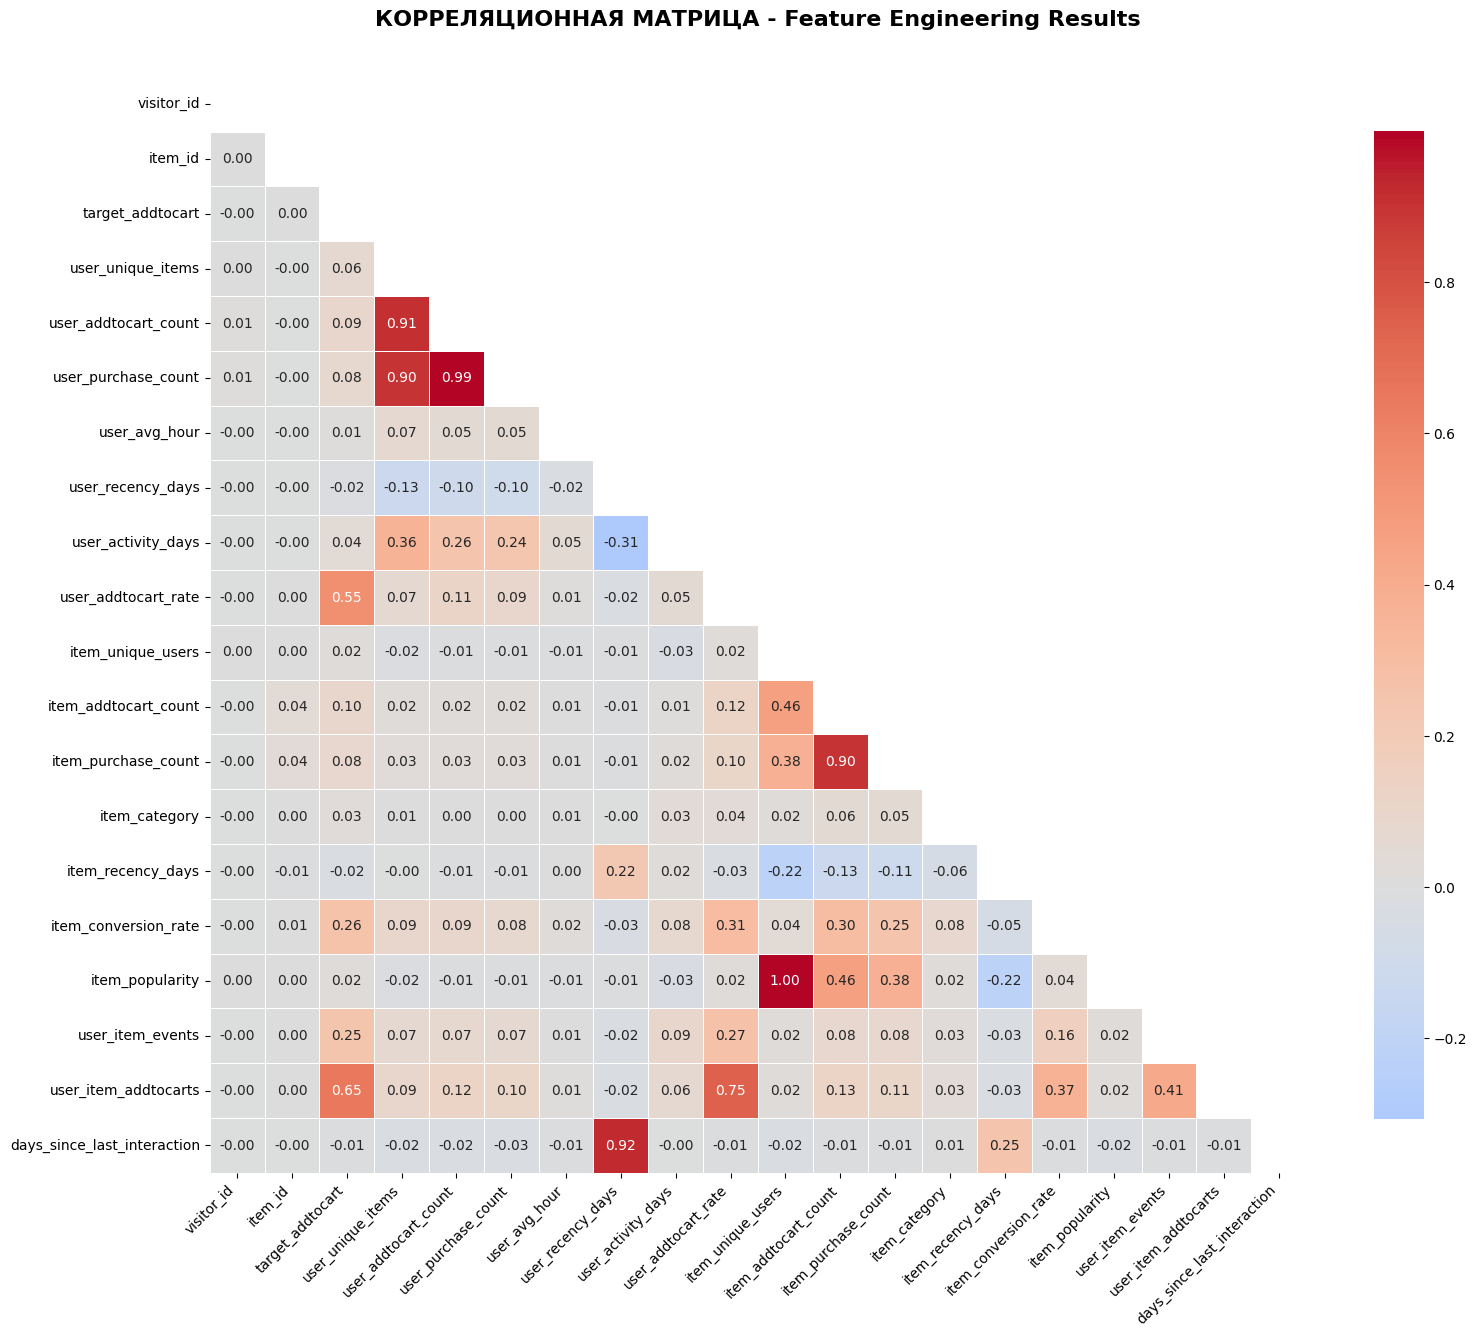

 Корреляционная матрица сохранена: 'correlation_matrix.png'


In [39]:
print("=" * 80)
print(" ПОСТРОЕНИЕ КОРРЕЛЯЦИОННОЙ МАТРИЦЫ")
print("=" * 80)

import matplotlib.pyplot as plt
import seaborn as sns

# Выбираем только числовые колонки для корреляционного анализа
numeric_columns = features_dataset.select_dtypes(include=[np.number]).columns

print(" Анализируем корреляции между фичами...")
correlation_matrix = features_dataset[numeric_columns].corr()

print(f" Корреляционная матрица создана: {correlation_matrix.shape}")

# Строим тепловую карту
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Маска для верхнего треугольника

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            square=True, 
            linewidths=0.5,
            cbar_kws={"shrink": .8})

plt.title('КОРРЕЛЯЦИОННАЯ МАТРИЦА - Feature Engineering Results\n', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Сохраняем график
plt.savefig('feature_engineering/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Корреляционная матрица сохранена: 'correlation_matrix.png'")


In [40]:

print("\n АНАЛИЗ КОРРЕЛЯЦИЙ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ:")
target_correlations = correlation_matrix['target_addtocart'].sort_values(ascending=False)

print("\nТоп-10 самых коррелирующих фич с target_addtocart:")
for i, (feature, corr) in enumerate(target_correlations.head(11).items(), 1):
    if feature != 'target_addtocart':  # Пропускаем сам target
        print(f"   {i:2d}. {feature:30} : {corr:6.3f}")

print("\n🔍 ВЫСОКАЯ КОРРЕЛЯЦИЯ МЕЖДУ ФИЧАМИ (потенциальная мультиколлинеарность):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8 and i != j:
            high_corr_pairs.append((
                correlation_matrix.columns[i], 
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)[:5]:
        print(f"  {feat1:25} ↔ {feat2:25} : {corr:.3f}")
else:
    print(" Нет сильно коррелирующих пар фич")



 АНАЛИЗ КОРРЕЛЯЦИЙ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ:

Топ-10 самых коррелирующих фич с target_addtocart:
    2. user_item_addtocarts           :  0.648
    3. user_addtocart_rate            :  0.553
    4. item_conversion_rate           :  0.263
    5. user_item_events               :  0.250
    6. item_addtocart_count           :  0.096
    7. user_addtocart_count           :  0.090
    8. item_purchase_count            :  0.083
    9. user_purchase_count            :  0.076
   10. user_unique_items              :  0.064
   11. user_activity_days             :  0.042

🔍 ВЫСОКАЯ КОРРЕЛЯЦИЯ МЕЖДУ ФИЧАМИ (потенциальная мультиколлинеарность):
  item_unique_users         ↔ item_popularity           : 1.000
  user_addtocart_count      ↔ user_purchase_count       : 0.992
  user_recency_days         ↔ days_since_last_interaction : 0.921
  user_unique_items         ↔ user_addtocart_count      : 0.905
  user_unique_items         ↔ user_purchase_count       : 0.902


Обоснование выбора:  
    - item_popularity и item_unique_users - одинаковые фичи  
    - user_purchase_count и user_addtocart_count - сильно связаны, оставляем более релевантную для нашей цели  
    - days_since_last_interaction и user_recency_days - дублирующая информация  


Обоснование почему оставляем:  
    - user_unique_items - широта интересов (сколько разных товаров смотрел)
    - user_addtocart_count - глубина вовлечения (сколько раз добавлял в корзину)
    - user_purchase_count - конечная конверсия (сколько раз покупал)

Это разные метрики пользовательского поведения.
    - Пользователи с высокой user_unique_items но низкой user_addtocart_count - "смотрелки"  
    - Пользователи с низкой user_unique_items но высокой user_addtocart_count - "целевые покупатели"

In [41]:
print("=" * 80)
print(" FEATURE SELECTION НА ОСНОВЕ КОРРЕЛЯЦИОННОГО АНАЛИЗА")
print("=" * 80)

print(" СТРАТЕГИЯ УДАЛЕНИЯ ФИЧ:")
print("1. Удаляем фичи с корреляцией ~1.0 (полные дубликаты)")
print("2. Сохраняем фичи с высокой корреляцией с target")
print("3. Удаляем одну из сильно коррелирующих пар")

print("\n ФИЧИ ДЛЯ УДАЛЕНИЯ:")

features_to_remove = [
    'item_popularity',           # Полный дубликат item_unique_users (1.000)
    'user_purchase_count',       # Сильно коррелирует с user_addtocart_count (0.992)
    'days_since_last_interaction' # Сильно коррелирует с user_recency_days (0.921)
]

print(" УДАЛЯЕМ:")
for feature in features_to_remove:
    reason = {
        'item_popularity': 'Полный дубликат item_unique_users',
        'user_purchase_count': 'Сильная корреляция с user_addtocart_count', 
        'days_since_last_interaction': 'Сильная корреляция с user_recency_days'
    }
    print(f"   - {feature}: {reason[feature]}")

print("\n СОХРАНЯЕМ (важные для target):")
important_features = [
    'user_item_addtocarts',      # Высокая корреляция с target (0.648)
    'user_addtocart_rate',       # Высокая корреляция с target (0.553) 
    'item_conversion_rate',      # Средняя корреляция с target (0.263)
    'user_item_events',          # Средняя корреляция с target (0.250)
    'user_addtocart_count',      # Сохраняем вместо user_purchase_count
    'user_unique_items',         # Умеренная корреляция с target
    'user_recency_days',         # Сохраняем вместо days_since_last_interaction
    'item_unique_users'          # Сохраняем вместо item_popularity
]

for feature in important_features:
    print(f"   - {feature}")

print("\n ПРИМЕНЯЕМ FEATURE SELECTION:")
features_dataset_clean = features_dataset.drop(columns=features_to_remove)

print("\n ОБНОВЛЕННЫЙ НАБОР ФИЧ:")
clean_feature_groups = {
    'USER FEATURES': [col for col in features_dataset_clean.columns if col.startswith('user_')],
    'ITEM FEATURES': [col for col in features_dataset_clean.columns if col.startswith('item_')],
    'INTERACTION FEATURES': [col for col in features_dataset_clean.columns if 'user_item' in col],
    'TARGET': ['target_addtocart']
}

for group, features in clean_feature_groups.items():
    print(f"   {group} ({len(features)}): {features}")

print("\n СОХРАНЯЕМ ОЧИЩЕННЫЙ ДАТАСЕТ:")
features_dataset_clean.to_csv('feature_engineering/features_dataset_clean.csv', index=False)

print("Очищенный датасет сохранен: 'features_dataset_clean.csv'")

 FEATURE SELECTION НА ОСНОВЕ КОРРЕЛЯЦИОННОГО АНАЛИЗА
 СТРАТЕГИЯ УДАЛЕНИЯ ФИЧ:
1. Удаляем фичи с корреляцией ~1.0 (полные дубликаты)
2. Сохраняем фичи с высокой корреляцией с target
3. Удаляем одну из сильно коррелирующих пар

 ФИЧИ ДЛЯ УДАЛЕНИЯ:
 УДАЛЯЕМ:
   - item_popularity: Полный дубликат item_unique_users
   - user_purchase_count: Сильная корреляция с user_addtocart_count
   - days_since_last_interaction: Сильная корреляция с user_recency_days

 СОХРАНЯЕМ (важные для target):
   - user_item_addtocarts
   - user_addtocart_rate
   - item_conversion_rate
   - user_item_events
   - user_addtocart_count
   - user_unique_items
   - user_recency_days
   - item_unique_users

 ПРИМЕНЯЕМ FEATURE SELECTION:

 ОБНОВЛЕННЫЙ НАБОР ФИЧ:
   USER FEATURES (8): ['user_unique_items', 'user_addtocart_count', 'user_avg_hour', 'user_recency_days', 'user_activity_days', 'user_addtocart_rate', 'user_item_events', 'user_item_addtocarts']
   ITEM FEATURES (7): ['item_id', 'item_unique_users', 'item_addtocar

 Анализируем корреляции между фичами...
 Корреляционная матрица создана: (17, 17)


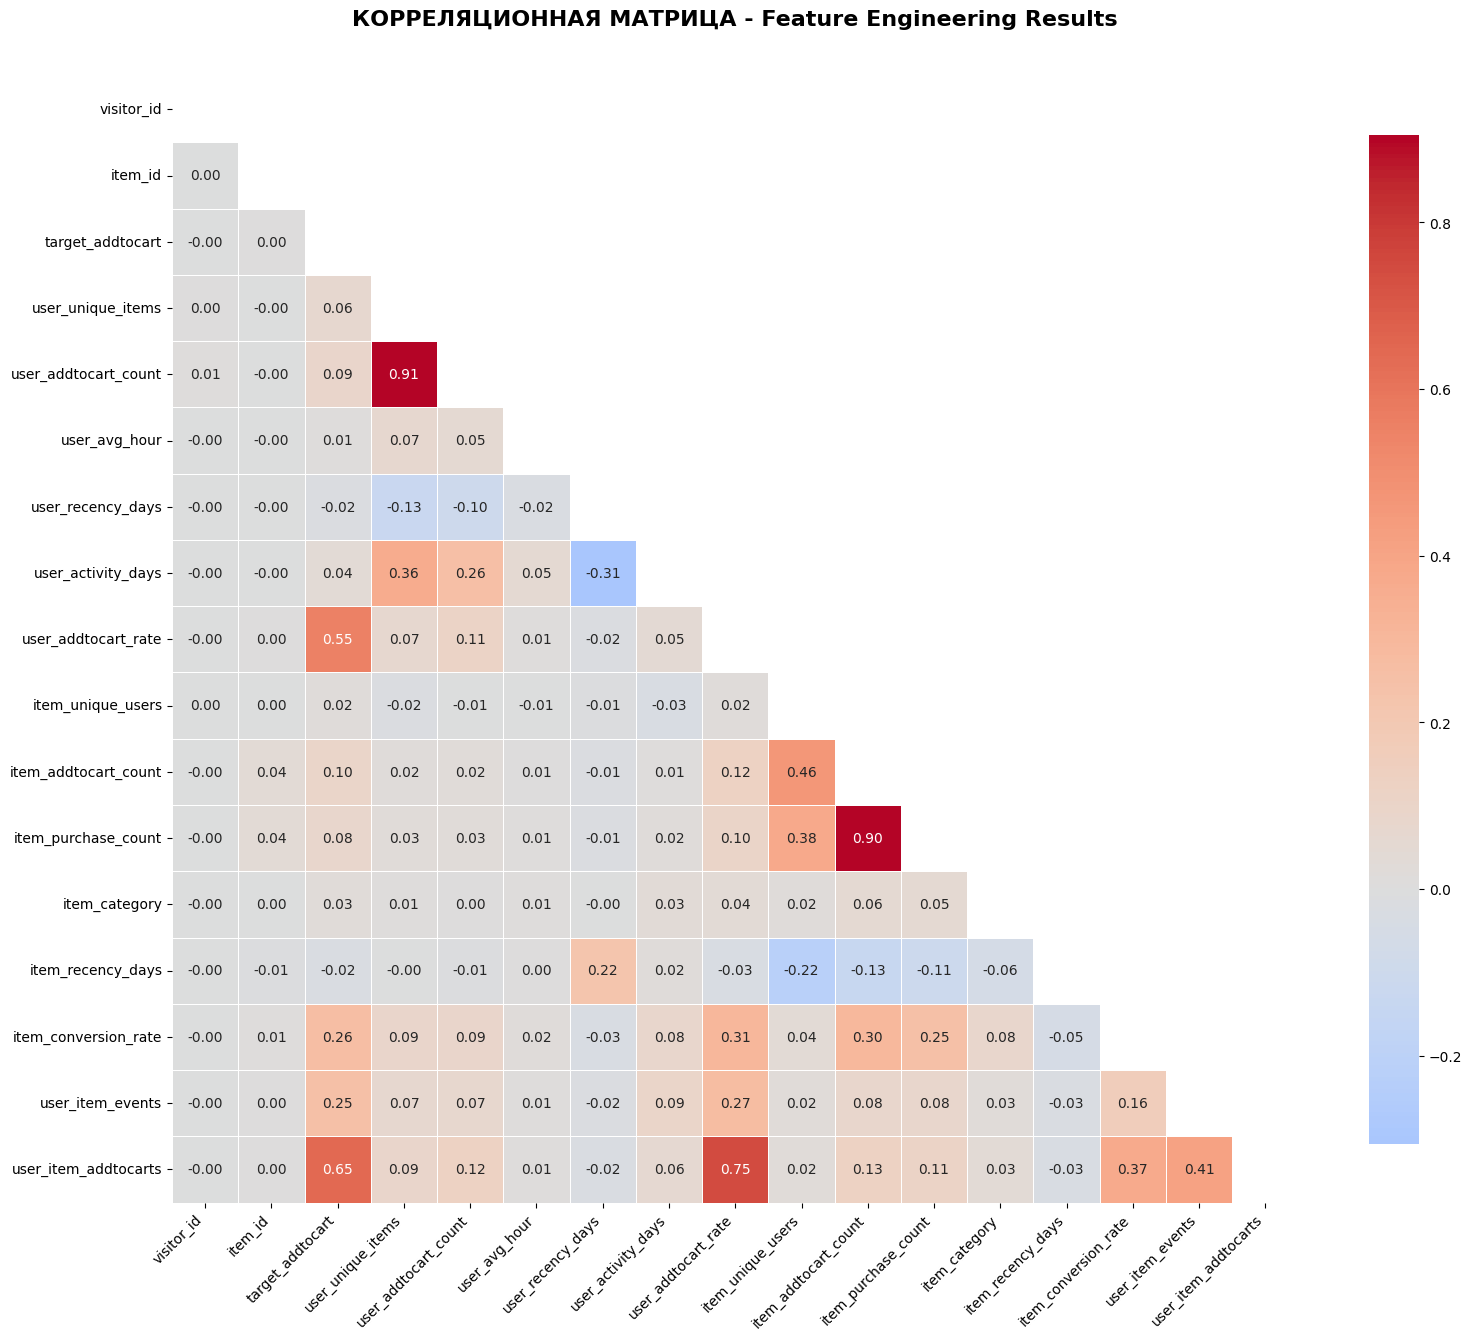

In [42]:
print(" Анализируем корреляции между фичами...")
numeric_columns = features_dataset_clean.select_dtypes(include=[np.number]).columns

correlation_matrix = features_dataset_clean[numeric_columns].corr()

print(f" Корреляционная матрица создана: {correlation_matrix.shape}")

# Строим тепловую карту
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Маска для верхнего треугольника

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            square=True, 
            linewidths=0.5,
            cbar_kws={"shrink": .8})

plt.title('КОРРЕЛЯЦИОННАЯ МАТРИЦА - Feature Engineering Results\n', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

In [43]:
features_dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196371 entries, 0 to 2196370
Data columns (total 17 columns):
 #   Column                Dtype  
---  ------                -----  
 0   visitor_id            int64  
 1   item_id               int64  
 2   target_addtocart      int64  
 3   user_unique_items     int64  
 4   user_addtocart_count  int64  
 5   user_avg_hour         float64
 6   user_recency_days     int64  
 7   user_activity_days    int64  
 8   user_addtocart_rate   float64
 9   item_unique_users     int64  
 10  item_addtocart_count  int64  
 11  item_purchase_count   int64  
 12  item_category         float64
 13  item_recency_days     int64  
 14  item_conversion_rate  float64
 15  user_item_events      int64  
 16  user_item_addtocarts  int64  
dtypes: float64(4), int64(13)
memory usage: 284.9 MB
